In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn_extra.cluster import KMedoids

from time import time
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm


In [ ]:
#https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [ ]:
df = pd.read_csv( "NIPS_1987-2015.csv")
print(df.shape)
df

(11463, 5812)


,Unnamed: 0,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,...,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,abalone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abbeel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abbott,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abbreviate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abbreviated,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11458,zoo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11459,zoom,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11460,zou,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11461,zoubin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()#ino az hamoon shekl e bala check kon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11463 entries, 0 to 11462
Columns: 5812 entries, Unnamed: 0 to 2015_403
dtypes: int64(5811), object(1)
memory usage: 508.3+ MB


In [ ]:
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,11453,11454,11455,11456,11457,11458,11459,11460,11461,11462
Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,abilities,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
1987_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987_2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1987_3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1987_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015_399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_402,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df

Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,abilities,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
1987_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987_2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1987_3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1987_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987_5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015_399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_402,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
x= df.sum()
print("number of all words",x.sum())
x

number of all words 11040357


Unnamed: 0
abalone        111
abbeel         147
abbott         195
abbreviate      57
abbreviated     70
              ... 
zoo             52
zoom            75
zou            147
zoubin         220
zurich         117
Length: 11463, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28 missing from current font.
  font.set_text(s, 0, flags=flags)


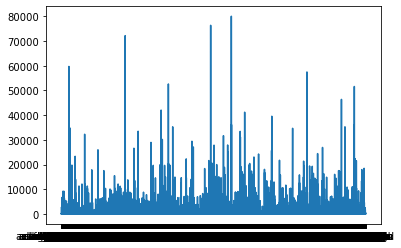

In [ ]:
plt.plot(df.columns.tolist(), df.sum())

In [ ]:
#remove raw that all columns is 0
num_of_raws = df.shape[0]
indexs =[]
for i in range(0,num_of_raws):
    if df.iloc[i].sum() == 0 :
        print(df.index[i])
        indexs.append(i)
for i in range ( 0, len(indexs)) :
    df = df.drop([df.index[indexs[i]]])


2004_126
2008_117
2011_98
2011_135
2011_240
2011_264
2015_188


In [ ]:
df.shape

(5804, 11463)

In [ ]:
selector = VarianceThreshold(threshold=0)
selector.fit_transform(df)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [ ]:
arr = selector.variances_
len(arr)

11463

In [ ]:
low_variance = []
for i in range ( 0 , len (arr)) :
    if( arr[i] < 0.011) :
        low_variance.append(i)
print(len(low_variance))
df.drop(df.columns[low_variance],axis=1, inplace = True)

112


In [ ]:
df.shape

(5804, 11351)

In [ ]:
df

Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,abilities,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
1987_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987_2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1987_3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1987_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987_5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015_399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_402,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
corr_matrix = df.astype('float64').corr()
corr_matrix

Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilities,ability,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
abalone,1.000000,-0.004459,-0.006799,-0.006011,-0.006637,0.009034,-0.004029,-0.004358,-0.012222,-0.011201,...,-0.008545,-0.006945,-0.006252,-0.003594,0.050667,-0.004398,0.010107,0.025752,0.068120,-0.006295
abbeel,-0.004459,1.000000,-0.006668,0.010439,-0.002838,0.000518,-0.003952,-0.004274,-0.010372,0.016732,...,-0.005418,0.000218,-0.006132,0.006861,-0.003132,-0.001038,-0.005542,-0.005097,-0.005852,-0.006174
abbott,-0.006799,-0.006668,1.000000,-0.008988,-0.005704,0.002053,0.029447,-0.006516,0.018855,0.003385,...,-0.009707,-0.016213,-0.009349,-0.005374,0.008978,-0.002812,-0.001743,-0.008474,-0.010152,0.016927
abbreviate,-0.006011,0.010439,-0.008988,1.000000,0.029514,-0.007836,-0.005327,-0.001249,-0.004928,-0.010858,...,-0.009734,-0.005248,0.030430,-0.004752,-0.004222,-0.005814,-0.007470,0.003620,0.004781,-0.008322
abbreviated,-0.006637,-0.002838,-0.005704,0.029514,1.000000,-0.003704,-0.005881,-0.002304,-0.007743,-0.004628,...,0.015383,0.019020,0.025662,-0.005246,0.001572,-0.006419,0.000870,-0.004521,-0.008465,-0.009188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoo,-0.004398,-0.001038,-0.002812,-0.005814,-0.006419,-0.001320,-0.003897,-0.004215,0.001688,-0.003103,...,0.121573,0.046533,0.009469,-0.003476,-0.003088,1.000000,-0.005465,0.003564,-0.004435,-0.006088
zoom,0.010107,-0.005542,-0.001743,-0.007470,0.000870,-0.007365,-0.005007,-0.002192,-0.007165,0.004799,...,-0.015544,0.005908,-0.007769,-0.004466,0.000985,-0.005465,1.000000,0.014412,-0.007498,-0.007822
zou,0.025752,-0.005097,-0.008474,0.003620,-0.004521,0.012176,-0.006297,0.001463,-0.016527,-0.003587,...,0.063092,0.065787,-0.009771,-0.005617,-0.004990,0.003564,0.014412,1.000000,0.003728,-0.003198


In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

<ipython-input-18-275f9e57004f>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilities,ability,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
abalone,NaN,-0.004459,-0.006799,-0.006011,-0.006637,0.009034,-0.004029,-0.004358,-0.012222,-0.011201,...,-0.008545,-0.006945,-0.006252,-0.003594,0.050667,-0.004398,0.010107,0.025752,0.068120,-0.006295
abbeel,NaN,NaN,-0.006668,0.010439,-0.002838,0.000518,-0.003952,-0.004274,-0.010372,0.016732,...,-0.005418,0.000218,-0.006132,0.006861,-0.003132,-0.001038,-0.005542,-0.005097,-0.005852,-0.006174
abbott,NaN,NaN,NaN,-0.008988,-0.005704,0.002053,0.029447,-0.006516,0.018855,0.003385,...,-0.009707,-0.016213,-0.009349,-0.005374,0.008978,-0.002812,-0.001743,-0.008474,-0.010152,0.016927
abbreviate,NaN,NaN,NaN,NaN,0.029514,-0.007836,-0.005327,-0.001249,-0.004928,-0.010858,...,-0.009734,-0.005248,0.030430,-0.004752,-0.004222,-0.005814,-0.007470,0.003620,0.004781,-0.008322
abbreviated,NaN,NaN,NaN,NaN,NaN,-0.003704,-0.005881,-0.002304,-0.007743,-0.004628,...,0.015383,0.019020,0.025662,-0.005246,0.001572,-0.006419,0.000870,-0.004521,-0.008465,-0.009188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.005465,0.003564,-0.004435,-0.006088
zoom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014412,-0.007498,-0.007822
zou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003728,-0.003198


In [ ]:
max_corr = upper.abs().max()

In [ ]:
drop_col = []
for i in range(0, len(upper_corr)) :
    if ( upper_corr[i]> 0.8) :
        drop_col.append(df.columns[i])
print("drop col :" , drop_col)


drop col : ['absorption', 'abstractions', 'advertisements', 'advertisers', 'amino', 'analogy', 'ancestral', 'annotators', 'arms', 'articulatory', 'artists', 'atoms', 'auctions', 'axonal', 'barhen', 'biasing', 'biclusters', 'bidder', 'bidders', 'blockmodels', 'bob', 'borrowed', 'borrowing', 'buyers', 'captchas', 'captions', 'cesa', 'chorales', 'clamping', 'coeffi', 'community', 'consciousness', 'contacts', 'conventions', 'copulas', 'critic', 'cuboids', 'curio', 'deblurring', 'diabetes', 'diamond', 'disks', 'disparity', 'divide', 'documents', 'dqn', 'dueling', 'echoes', 'ego', 'electrostatic', 'els', 'englewood', 'equalizer', 'exercise', 'exercises', 'exogenous', 'facebook', 'faults', 'filterboost', 'fingerprints', 'fisherface', 'fouling', 'fragmentation', 'fragments', 'games', 'ganglia', 'glimpses', 'granule', 'grasping', 'haplotypes', 'hasselmo', 'hawkes', 'hearer', 'hermite', 'hierar', 'hints', 'hips', 'holdout', 'homeostasis', 'honor', 'huxley', 'hyperedges', 'hypergraph', 'hypergrap

In [ ]:
drop_col=['absorption', 'abstractions', 'advertisements', 'advertisers', 'amino', 'analogy', 'ancestral', 'annotators', 'arms', 'articulatory', 'artists', 'atoms', 'auctions', 'axonal', 'barhen', 'biasing', 'biclusters', 'bidder', 'bidders', 'blockmodels', 'bob', 'borrowed', 'borrowing', 'buyers', 'captchas', 'captions', 'cesa', 'chorales', 'clamping', 'coeffi', 'community', 'consciousness', 'contacts', 'conventions', 'copulas', 'critic', 'cuboids', 'curio', 'deblurring', 'diabetes', 'diamond', 'disks', 'disparity', 'divide', 'documents', 'dqn', 'dueling', 'echoes', 'ego', 'electrostatic', 'els', 'englewood', 'equalizer', 'exercise', 'exercises', 'exogenous', 'facebook', 'faults', 'filterboost', 'fingerprints', 'fisherface', 'fouling', 'fragmentation', 'fragments', 'games', 'ganglia', 'glimpses', 'granule', 'grasping', 'haplotypes', 'hasselmo', 'hawkes', 'hearer', 'hermite', 'hierar', 'hints', 'hips', 'holdout', 'homeostasis', 'honor', 'huxley', 'hyperedges', 'hypergraph', 'hypergraphs', 'illuminant', 'impressions', 'indian', 'inh', 'inheritance', 'inhibitory', 'insects', 'instability', 'instructions', 'international', 'interventions', 'investors', 'invite', 'ipsilateral', 'isomorphic', 'japanese', 'jerusalem', 'kingmans', 'knots', 'kong', 'labelers', 'lacoste', 'landauer', 'las', 'lawmakers', 'leapfrog', 'leibler', 'lesions', 'listen', 'magdon', 'mains', 'male', 'males', 'managers', 'markets', 'maxw', 'mcg', 'mellon', 'melody', 'mentions', 'meshes', 'micl', 'microcircuits', 'mines', 'minutiae', 'modality', 'monaural', 'money', 'monte', 'morton', 'motifs', 'mounted', 'multilingual', 'neighbor', 'ney', 'nissim', 'ocular', 'opponents', 'orbits', 'oscillates', 'oscillators', 'outbreak', 'outlines', 'owl', 'owls', 'pace', 'packets', 'palo', 'pan', 'pareto', 'parti', 'particles', 'peg', 'perfor', 'permitted', 'personal', 'phrases', 'pieces', 'pietra', 'pilco', 'pitts', 'pivot', 'plans', 'poker', 'poo', 'poon', 'posted', 'pragmatic', 'precursor', 'print', 'prints', 'privacy', 'private', 'proce', 'processors', 'productive', 'prof', 'propensity', 'proteins', 'pruning', 'pur', 'rae', 'ray', 'razor', 'reactions', 'recoverability', 'recoverable', 'redlich', 'reinforce', 'replacements', 'replay', 'reserve', 'restaurant', 'retention', 'reverberation', 'rewarding', 'rhythms', 'right', 'rnade', 'roads', 'rollouts', 'rosetta', 'rvs', 'sectional', 'sed', 'seidel', 'selector', 'senn', 'sentences', 'servan', 'sharpness', 'shattering', 'sheets', 'shuffling', 'shwartz', 'sian', 'signatures', 'singly', 'sip', 'sodium', 'sofa', 'spammer', 'spammers', 'spinal', 'spld', 'spn', 'spotting', 'ssda', 'ssipp', 'stale', 'staleness', 'statistica', 'steveninck', 'stocks', 'storm', 'stratum', 'subgoals', 'subscriber', 'substrings', 'subtask', 'subunits', 'summarization', 'superpixels', 'surplus', 'svt', 'sweeping', 'symbols', 'tags', 'tel', 'tensors', 'tep', 'tha', 'therapy', 'tiled', 'timino', 'toe', 'toeplitz', 'topics', 'trader', 'traders', 'trades', 'traits', 'transducers', 'transformer', 'triangular', 'triggs', 'truthful', 'tunneling', 'typing', 'uhlenbeck', 'uncer', 'ungrammatical', 'unordered', 'uous', 'urbana', 'verbs', 'vice', 'viewer', 'volatility', 'voxels', 'wagner', 'walks', 'war', 'webspam', 'weisfeiler', 'welch', 'wesley', 'westervelt', 'winter', 'wiring', 'wolf', 'wolsey', 'workers', 'yee']

In [ ]:
len(drop_col)

298

In [ ]:
df.drop(drop_col, axis = 1 , inplace = True)
df.shape

(5804, 11053)

In [ ]:
pca2= PCA()
pca2.fit(x)

PCA()

In [1]:
# pca = PCA()
# pca.fit(df)

In [ ]:
pca.components_

array([[ 4.74808827e-04,  1.06913295e-03, -1.83760738e-03, ...,
         7.11380112e-04,  4.01326338e-04, -1.80467843e-04],
       [ 4.25287779e-04, -1.13126313e-04, -6.34797056e-05, ...,
         5.68971040e-05,  1.77758697e-03,  2.08259528e-05],
       [-6.46714089e-05, -2.05446247e-04, -4.92252582e-04, ...,
        -1.20008517e-04, -8.60785563e-04,  3.85457138e-05],
       ...,
       [ 2.06668287e-03, -3.37790770e-03,  7.41505084e-04, ...,
         5.36078650e-03, -6.22350319e-03,  3.04419937e-03],
       [ 3.93929720e-03, -6.93626124e-03,  2.69745821e-02, ...,
         9.41206560e-03,  1.96950854e-02, -1.38779141e-02],
       [ 1.64385340e-03, -1.26712753e-03, -1.01678785e-02, ...,
         1.15585714e-02, -4.82596035e-03,  2.51123051e-04]])

In [ ]:
pca.explained_variance_ratio_


array([3.52333881e-02, 3.17246941e-02, 2.17830731e-02, ...,
       7.49760302e-36, 5.99003283e-36, 4.35327536e-36])

In [ ]:
df.shape

(5804, 11165)

In [2]:
# plt.rcParams["figure.figsize"] = (12,6)
# fig, ax = plt.subplots()
# xi = np.arange(0, df.shape[0], step=1)
# y = np.cumsum(pca.explained_variance_ratio_)

# plt.ylim(0.0,1.1)
# plt.plot(xi, y)

# plt.xlabel('Number of Components')
# plt.xticks(np.arange(0, df.shape[0], step=400)) #change from 0-based array index to 1-based human-readable label
# plt.ylabel('Cumulative variance (%)')
# plt.title('The number of components to explain variance')

# plt.axhline(y=0.85, color='r', linestyle='-')
# plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=12)

# ax.grid(axis='x')
# plt.show()

In [ ]:
pca = PCA(n_components=800)
pca_data = pca.fit_transform(df)
pca_data

array([[-24.37017648, -25.93919931,  -3.51468079, ...,  -0.67156441,
          0.35337543,   0.51114668],
       [-20.31847231, -13.11744978,  21.82981478, ...,   0.41739997,
          1.23464089,  -1.63409218],
       [-26.74119309, -24.39689193,   8.45183575, ...,   1.21170403,
         -0.37913502,  -1.32474752],
       ...,
       [ 39.19555987, -34.63174133, -23.90070016, ...,  -0.11905713,
          1.2547666 ,   0.56970297],
       [ 31.45924188, -34.91609827,  -4.71115359, ...,   0.24528144,
          1.85835756,  -1.14623584],
       [ 27.88764029,  28.24974285, -21.68621832, ...,  -0.19615704,
          2.21506691,   0.38715143]])

In [ ]:
pca_data.shape

(5804, 800)

In [ ]:
wcss = []#Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
for i in range(1,45):
    kmean = KMeans(n_clusters = i, init = "k-means++" , random_state=42 , max_iter= 200)
    kmean.fit(pca_data)
    wcss.append(kmean.inertia_)

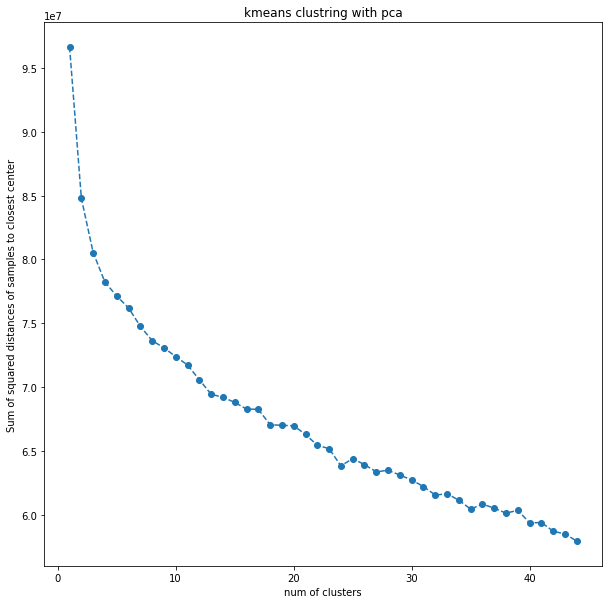

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,45),wcss , linestyle = '--' , marker ='o')
plt.xlabel('num of clusters')
plt.ylabel('Sum of squared distances of samples to closest center')
plt.title('kmeans clustring with pca')
plt.show()

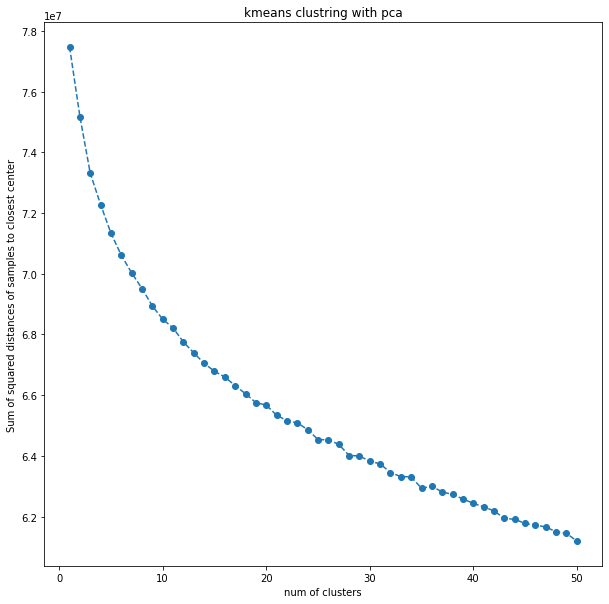

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,45),wcss , linestyle = '--' , marker ='o')
plt.xlabel('num of clusters')
plt.ylabel('Sum of squared distances of samples to closest center')
plt.title('kmeans clustring with pca')
plt.show()

In [ ]:
sil_kmeans = []
for i in range(2,50):
    kmean = KMeans(n_clusters = i, init = "k-means++" , random_state=42 , max_iter= 100)
    kmean.fit(pca_data)
    labels = kmean.labels_
#     wcss_k_medoid.append(kemedoid.inertia_)
    sil_kmeans.append(silhouette_score(pca_data, labels, metric = 'euclidean'))

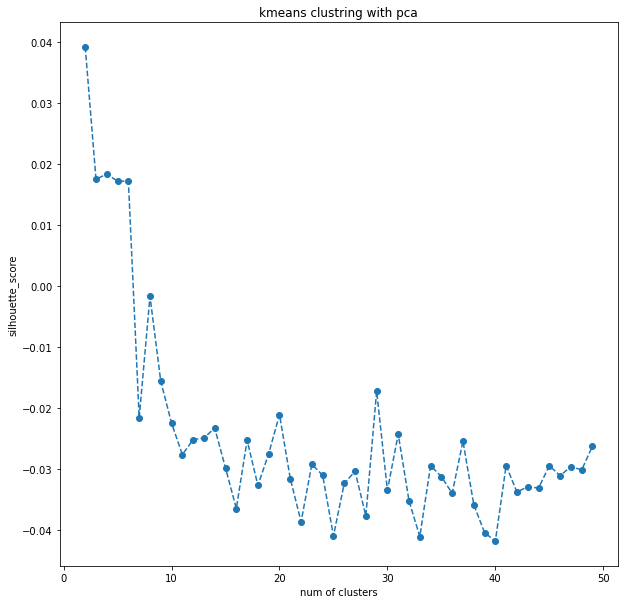

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(2,50),sil_kmeans , linestyle = '--' , marker ='o')
plt.xlabel('num of clusters')
plt.ylabel('silhouette_score')
plt.title('kmeans clustring with pca')
plt.show()

For n_clusters = 7 The average silhouette_score is : 0.024637454696582795


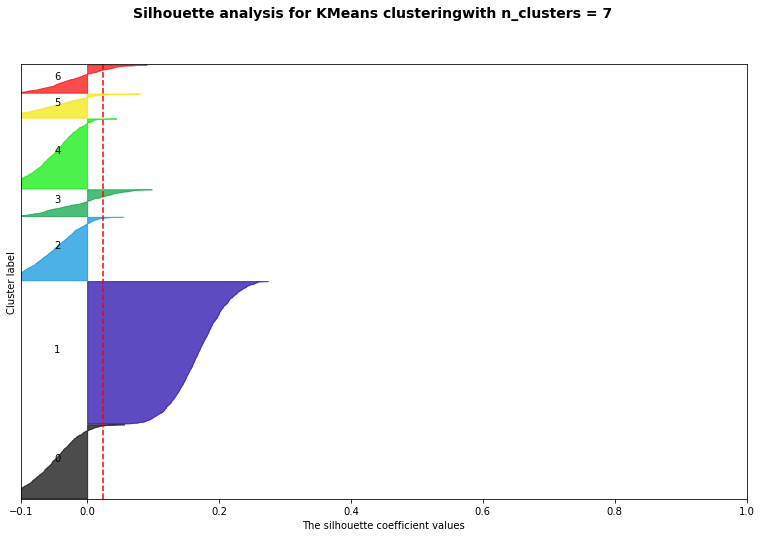

In [ ]:



range_n_clusters = [7]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(13, 8)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_data400) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_data400)
    silhouette_avg = silhouette_score(pca_data400, cluster_labels, metric = 'euclidean')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data400, cluster_labels,metric = 'euclidean')

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
best_kmeans = KMeans(n_clusters = 7, init = "k-means++" , max_iter = 200)
label = best_kmeans.fit_predict(pca_data)

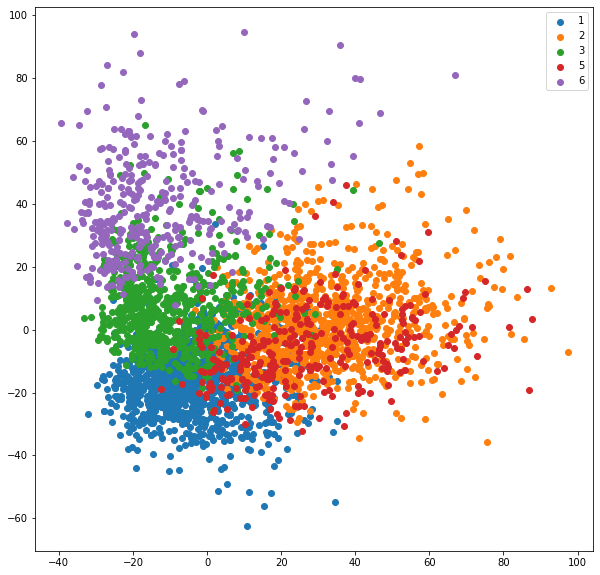

In [ ]:
centers = np.array(best_kmeans.cluster_centers_)
plt.figure(figsize=(10,10))
uniq = [1,2,3,5,6]#np.unique(label)
for i in uniq:
        plt.scatter(pca_data400[label == i , 1] , pca_data400[label == i , 3] , label = i)
#         plt.scatter(centers[:,1], centers[:,2], marker="x", color='k')

plt.legend()
plt.show()

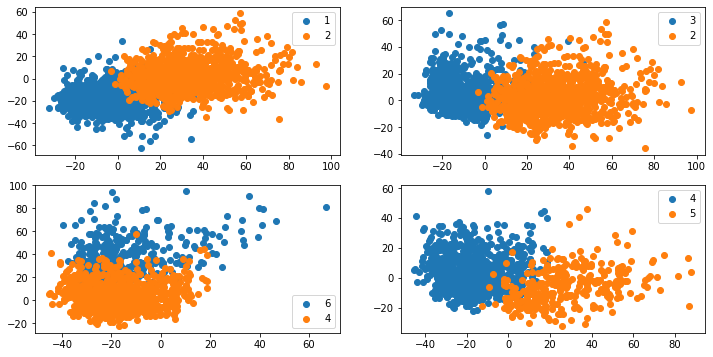

In [ ]:
fig = plt.figure()

plt.subplot(2, 2, 1)
uniq = [1,2]#np.unique(label)
for i in uniq:
    plt.scatter(pca_data400[label == i , 1] , pca_data400[label == i , 3] , label = i)
plt.legend()
plt.subplot(2, 2, 2)
uniq = [3,2]#np.unique(label)
for i in uniq:
    plt.scatter(pca_data400[label == i , 1] , pca_data400[label == i , 3] , label = i)
plt.legend()
plt.subplot(2, 2, 3)
uniq = [6,4]#np.unique(label)
for i in uniq:
    plt.scatter(pca_data400[label == i , 1] , pca_data400[label == i , 3] , label = i)
plt.legend()
plt.subplot(2, 2, 4)
uniq = [4,5]#np.unique(label)
for i in uniq:
    plt.scatter(pca_data400[label == i , 1] , pca_data400[label == i , 3] , label = i)
plt.legend()
plt.show()

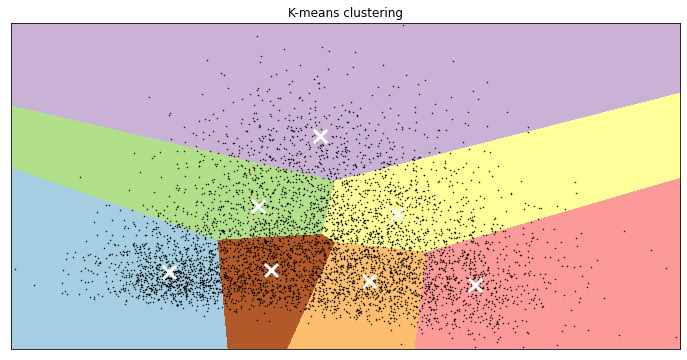

In [ ]:
np.random.seed(42)
reduced_data = pca_data400[:,0:2]
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=1)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10 )
plt.title('K-means clustering' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

No handles with labels found to put in legend.


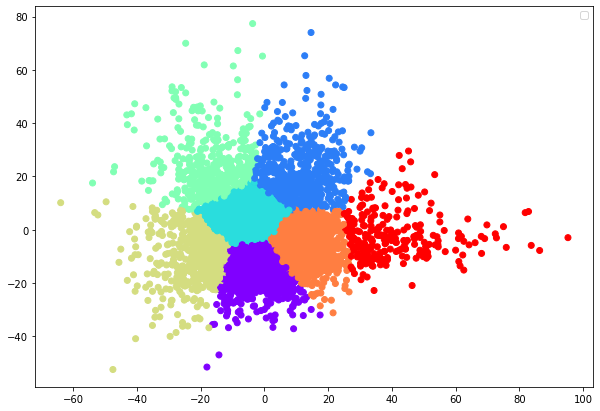

In [ ]:
plt.figure(figsize=(10, 7))
reduced_data = pca_data400[:,4:6]
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
kmeans.fit(reduced_data)
plt.scatter(pca_data400[:,4], pca_data400[:,5],  c=kmeans.labels_, cmap='rainbow')
plt.legend()

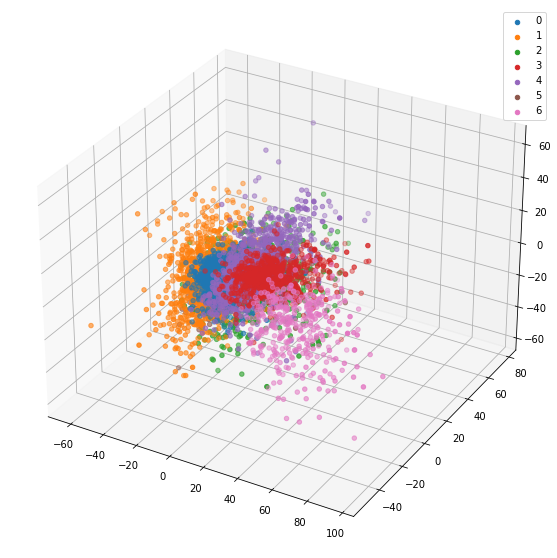

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")

uniq = np.unique(label)
for i in uniq:
    x = pca_data[label == i , 3]
    y =  pca_data[label == i , 5]
    z = pca_data[label == i , 8]
    ax.scatter3D(x, y, z , label = i)
#     ax.scatter3D(centers[:,3], centers[:,5],centers[:,8])

plt.legend()
plt.show()

In [ ]:
import operator
dict1 = df[label==10].sum().to_dict()
sorted(dict1.items(), key=operator.itemgetter(1), reverse=True)

[('learning', 10994),
 ('algorithm', 2123),
 ('function', 2068),
 ('model', 1960),
 ('time', 1874),
 ('error', 1864),
 ('training', 1632),
 ('set', 1527),
 ('figure', 1470),
 ('state', 1452),
 ('using', 1446),
 ('number', 1379),
 ('network', 1318),
 ('data', 1304),
 ('input', 1218),
 ('active', 1199),
 ('also', 1179),
 ('results', 1174),
 ('value', 1172),
 ('used', 1159),
 ('neural', 1140),
 ('based', 1132),
 ('task', 1111),
 ('given', 1090),
 ('problem', 1067),
 ('space', 1049),
 ('examples', 1044),
 ('performance', 1030),
 ('distribution', 1007),
 ('case', 1002),
 ('optimal', 998),
 ('system', 984),
 ('first', 948),
 ('reinforcement', 947),
 ('noise', 940),
 ('networks', 939),
 ('learn', 918),
 ('information', 914),
 ('probability', 911),
 ('rate', 905),
 ('output', 901),
 ('rule', 893),
 ('action', 882),
 ('values', 873),
 ('weight', 870),
 ('different', 868),
 ('algorithms', 850),
 ('example', 833),
 ('models', 825),
 ('random', 819),
 ('order', 810),
 ('use', 810),
 ('weights', 78

In [ ]:
import operator
dict1 = df400[label==1].sum().to_dict()
sorted(dict1.items(), key=operator.itemgetter(1), reverse=True)

[('data', 22109),
 ('matrix', 16470),
 ('learning', 12725),
 ('algorithm', 12277),
 ('set', 12121),
 ('problem', 11799),
 ('kernel', 11312),
 ('using', 10115),
 ('function', 9582),
 ('method', 8815),
 ('number', 8292),
 ('results', 7637),
 ('methods', 7603),
 ('linear', 7185),
 ('error', 7137),
 ('also', 7060),
 ('given', 6937),
 ('based', 6868),
 ('model', 6515),
 ('space', 6466),
 ('used', 6378),
 ('figure', 6355),
 ('training', 6261),
 ('first', 6172),
 ('points', 6170),
 ('vector', 5967),
 ('case', 5791),
 ('use', 5778),
 ('sparse', 5585),
 ('let', 5579),
 ('section', 5566),
 ('analysis', 5555),
 ('random', 5482),
 ('time', 5359),
 ('algorithms', 5261),
 ('theorem', 5252),
 ('norm', 5238),
 ('following', 5147),
 ('clustering', 5137),
 ('rank', 5126),
 ('approach', 4982),
 ('gaussian', 4965),
 ('large', 4944),
 ('information', 4922),
 ('different', 4902),
 ('dimensional', 4884),
 ('optimization', 4821),
 ('solution', 4771),
 ('feature', 4728),
 ('graph', 4715),
 ('regression', 4663)

In [ ]:
dict1 = df[label==1].sum().to_dict()
sorted(dict1.items(), key=operator.itemgetter(1), reverse=True)

[('graph', 5194),
 ('graphs', 2204),
 ('algorithm', 1915),
 ('set', 1743),
 ('model', 1442),
 ('learning', 1172),
 ('data', 1118),
 ('matrix', 1118),
 ('function', 1111),
 ('random', 1109),
 ('number', 1098),
 ('edges', 1094),
 ('edge', 1091),
 ('problem', 1066),
 ('nodes', 1005),
 ('given', 973),
 ('models', 963),
 ('using', 934),
 ('theorem', 909),
 ('figure', 878),
 ('vertices', 866),
 ('let', 848),
 ('results', 836),
 ('based', 824),
 ('also', 778),
 ('algorithms', 756),
 ('log', 739),
 ('probability', 736),
 ('clustering', 735),
 ('case', 716),
 ('structure', 715),
 ('time', 711),
 ('section', 708),
 ('first', 699),
 ('node', 692),
 ('large', 685),
 ('size', 657),
 ('use', 654),
 ('method', 647),
 ('vertex', 645),
 ('distribution', 618),
 ('cut', 611),
 ('following', 610),
 ('degree', 598),
 ('show', 595),
 ('bound', 576),
 ('graphical', 567),
 ('used', 564),
 ('different', 553),
 ('methods', 546),
 ('see', 543),
 ('networks', 527),
 ('analysis', 525),
 ('network', 516),
 ('inform

In [ ]:
# !conda install -c districtdatalabs yellowbrick

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer

In [ ]:

# kmeans = KMeans()
# visu = KElbowVisualizer(kmeans, k=(2, 50))
# visu.fit(df)
# visu.show()

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
#wcss_k_medoid = []#Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
sil = []
for i in range(2,18):
    kemedoid = KMedoids(n_clusters=i,init= 'k-medoids++', random_state=42 , max_iter = 100)
    kemedoid.fit(pca_data)
    labels = kemedoid.labels_
#     wcss_k_medoid.append(kemedoid.inertia_)
    sil.append(silhouette_score(pca_data, labels, metric = 'euclidean'))

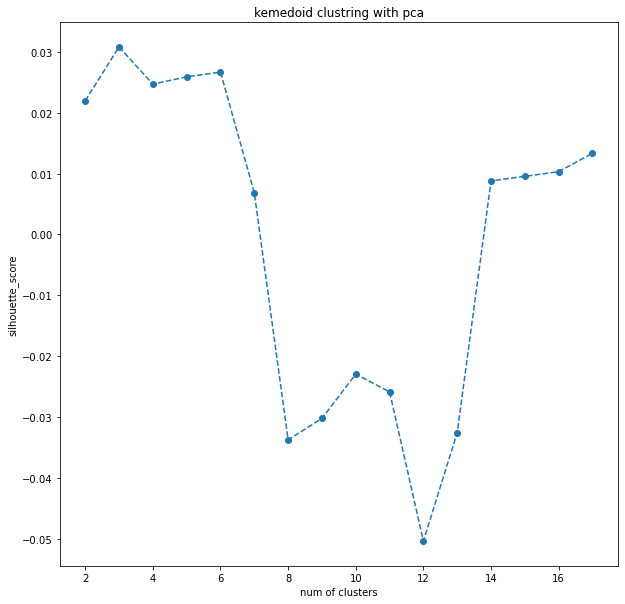

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(2,18),sil , linestyle = '--' , marker ='o')
plt.xlabel('num of clusters')
plt.ylabel('silhouette_score')
plt.title('kemedoid clustring with pca')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.021948627188045466
For n_clusters = 3 The average silhouette_score is : 0.030786006554423408


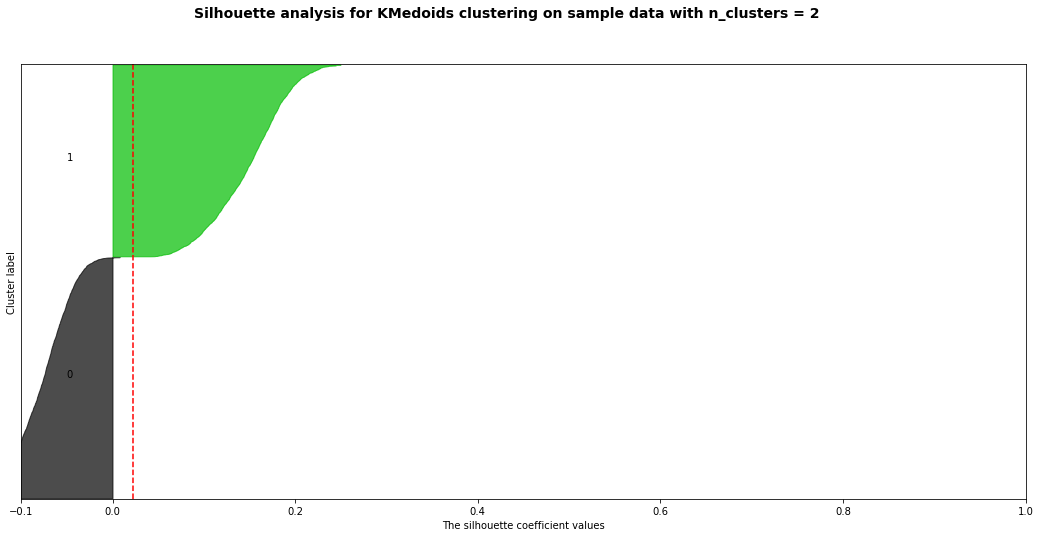

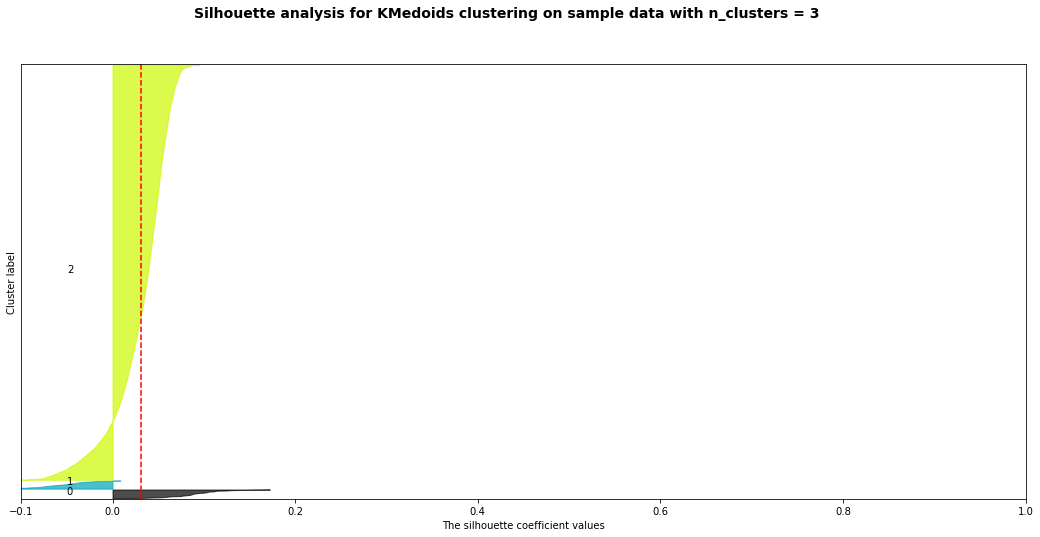

In [ ]:
range_n_clusters = [2,3]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer = KMedoids(n_clusters=n_clusters ,init= 'k-medoids++', random_state=42 , max_iter = 100)
    cluster_labels = clusterer.fit_predict(pca_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
best_kmedoids = KMedoids(n_clusters=14,init = 'k-medoids++').fit(pca_data)
best_kmedoids.labels_

array([ 6,  4,  6, ..., 12, 10, 10], dtype=int64)

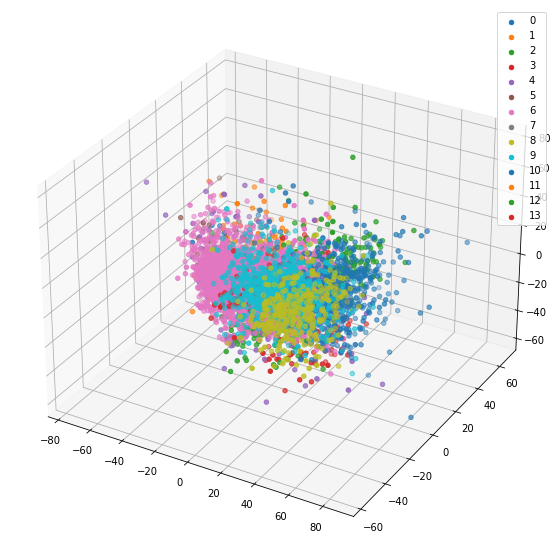

In [ ]:
kmedoid_label = best_kmedoids.fit_predict(pca_data)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")

#4 5 10
#4 8 10

uniq = np.unique(kmedoid_label)
for i in uniq:
    x = pca_data[kmedoid_label == i , 0]
    y =  pca_data[kmedoid_label == i ,9]
    z = pca_data[kmedoid_label == i , 5]
    ax.scatter3D(x, y, z ,label = i)
#     ax.scatter3D(centers[:,1], centers[:,5],centers[:,7])

plt.legend()
plt.show()

In [ ]:
#https://iq.opengenus.org/k-medoids-clustering/
#advantage and disadvantage
#youtube video
# https://www.youtube.com/watch?v=AtxQ0rvdQIA

In [ ]:
df.columns[0]

'abalone'

In [ ]:
dict1 = df[best_kmedoids.labels_==6].sum().to_dict()
sorted(dict1.items(), key=operator.itemgetter(1), reverse=True)

[('learning', 26600),
 ('data', 26308),
 ('model', 24191),
 ('set', 23103),
 ('function', 21703),
 ('network', 20645),
 ('using', 20623),
 ('figure', 20303),
 ('algorithm', 20271),
 ('time', 19101),
 ('neural', 17795),
 ('number', 16401),
 ('problem', 15618),
 ('used', 15549),
 ('training', 15164),
 ('input', 14959),
 ('results', 14597),
 ('given', 14573),
 ('also', 13797),
 ('networks', 13578),
 ('information', 13321),
 ('error', 12828),
 ('based', 12334),
 ('first', 12078),
 ('distribution', 11826),
 ('method', 11481),
 ('linear', 11225),
 ('use', 11200),
 ('models', 10975),
 ('different', 10911),
 ('case', 10897),
 ('space', 10874),
 ('probability', 10224),
 ('matrix', 9705),
 ('performance', 9670),
 ('order', 9668),
 ('vector', 9552),
 ('output', 9499),
 ('methods', 9434),
 ('system', 9343),
 ('approach', 8947),
 ('functions', 8789),
 ('kernel', 8722),
 ('example', 8576),
 ('state', 8572),
 ('large', 8549),
 ('may', 8538),
 ('value', 8515),
 ('algorithms', 8491),
 ('new', 8479),
 (

In [ ]:
dict1 = df[best_kmedoids.labels_==6].sum().to_dict()
sorted(dict1.items(), key=operator.itemgetter(1), reverse=True)

[('learning', 26600),
 ('data', 26308),
 ('model', 24191),
 ('set', 23103),
 ('function', 21703),
 ('network', 20645),
 ('using', 20623),
 ('figure', 20303),
 ('algorithm', 20271),
 ('time', 19101),
 ('neural', 17795),
 ('number', 16401),
 ('problem', 15618),
 ('used', 15549),
 ('training', 15164),
 ('input', 14959),
 ('results', 14597),
 ('given', 14573),
 ('also', 13797),
 ('networks', 13578),
 ('information', 13321),
 ('error', 12828),
 ('based', 12334),
 ('first', 12078),
 ('distribution', 11826),
 ('method', 11481),
 ('linear', 11225),
 ('use', 11200),
 ('models', 10975),
 ('different', 10911),
 ('case', 10897),
 ('space', 10874),
 ('probability', 10224),
 ('matrix', 9705),
 ('performance', 9670),
 ('order', 9668),
 ('vector', 9552),
 ('output', 9499),
 ('methods', 9434),
 ('system', 9343),
 ('approach', 8947),
 ('functions', 8789),
 ('kernel', 8722),
 ('example', 8576),
 ('state', 8572),
 ('large', 8549),
 ('may', 8538),
 ('value', 8515),
 ('algorithms', 8491),
 ('new', 8479),
 (

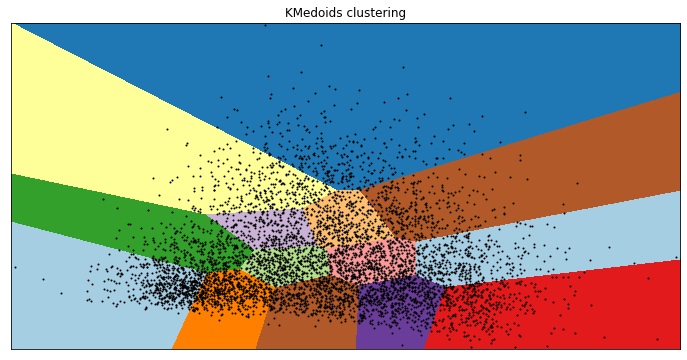

In [ ]:
np.random.seed(42)
reduced_data = pca_data[:,:2]
KMedoids = KMedoids( init = 'k-medoids++' ,n_clusters=14, max_iter=50)
KMedoids.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = KMedoids.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10 )
plt.title('KMedoids clustering' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

No handles with labels found to put in legend.


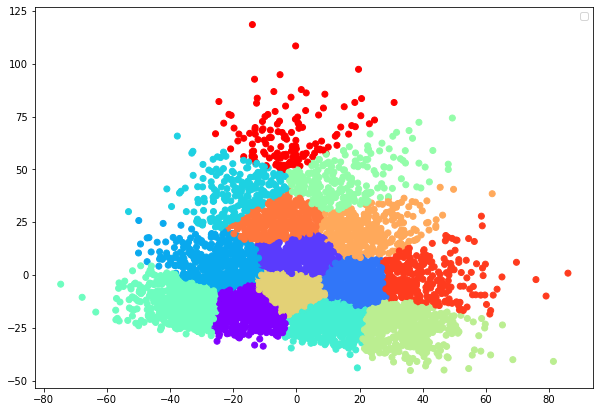

In [ ]:
plt.figure(figsize=(10, 7))
reduced_data = pca_data[:,:2]
best_kmedoids = KMedoids(n_clusters=14,init = 'k-medoids++').fit(reduced_data)
kmeans.fit(reduced_data)
plt.scatter(pca_data[:,0], pca_data[:,1],  c=best_kmedoids.labels_, cmap='rainbow')
plt.legend()

### Hierarchical Clustering: Agglomerativ

#

In [ ]:
#https://quick-adviser.com/how-do-you-find-the-optimal-number-of-clusters-in-hierarchical-clustering/
#vimp

In [ ]:
import scipy.cluster.hierarchy as shc
def dendrogramPlot(model, **kwargs):                                            # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])                                 # Create the counts of samples under each node

    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
agglomerative_model = AgglomerativeClustering(distance_threshold=0.1, n_clusters=None, linkage = 'ward')
ClusteringModel = agglomerative_model.fit(pca_data)

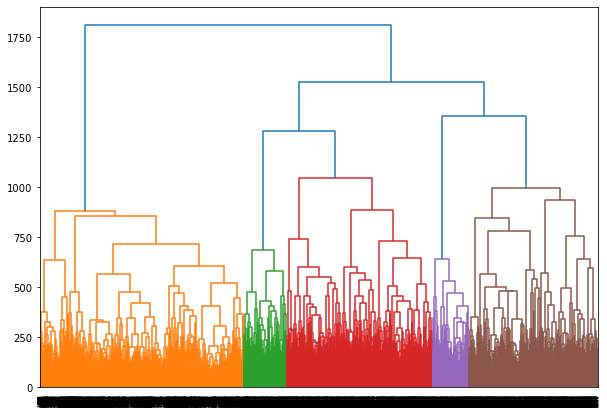

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(pca_data, method='ward') )

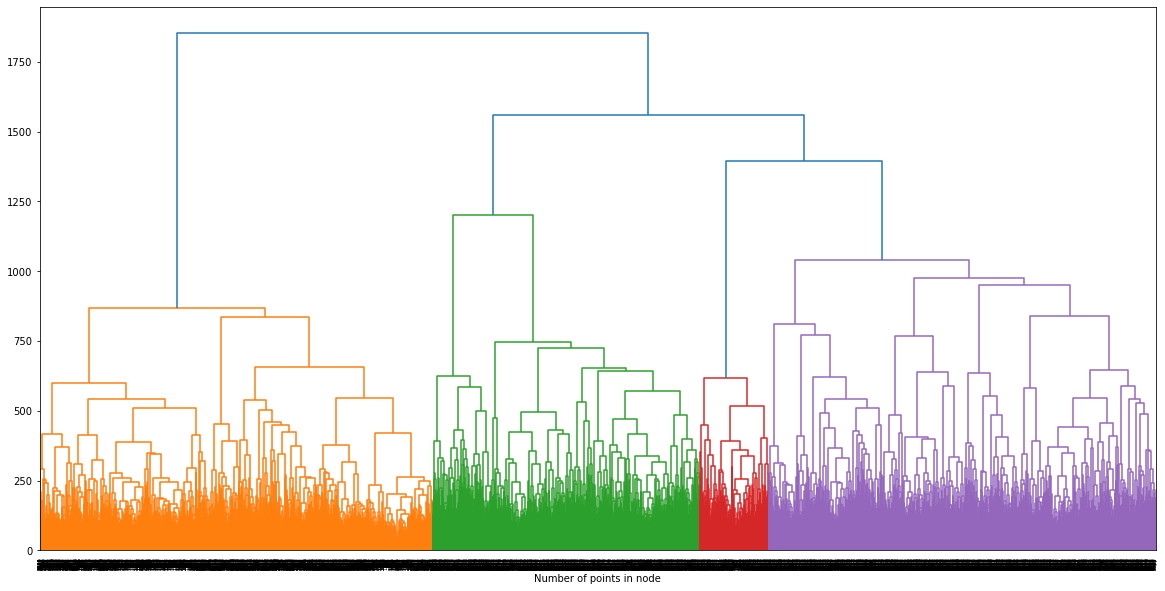

In [ ]:
plt.figure(figsize=(20,10))
dendrogramPlot(ClusteringModel, p=20, truncate_mode='level')
plt.xlabel("Number of points in node")
plt.show()

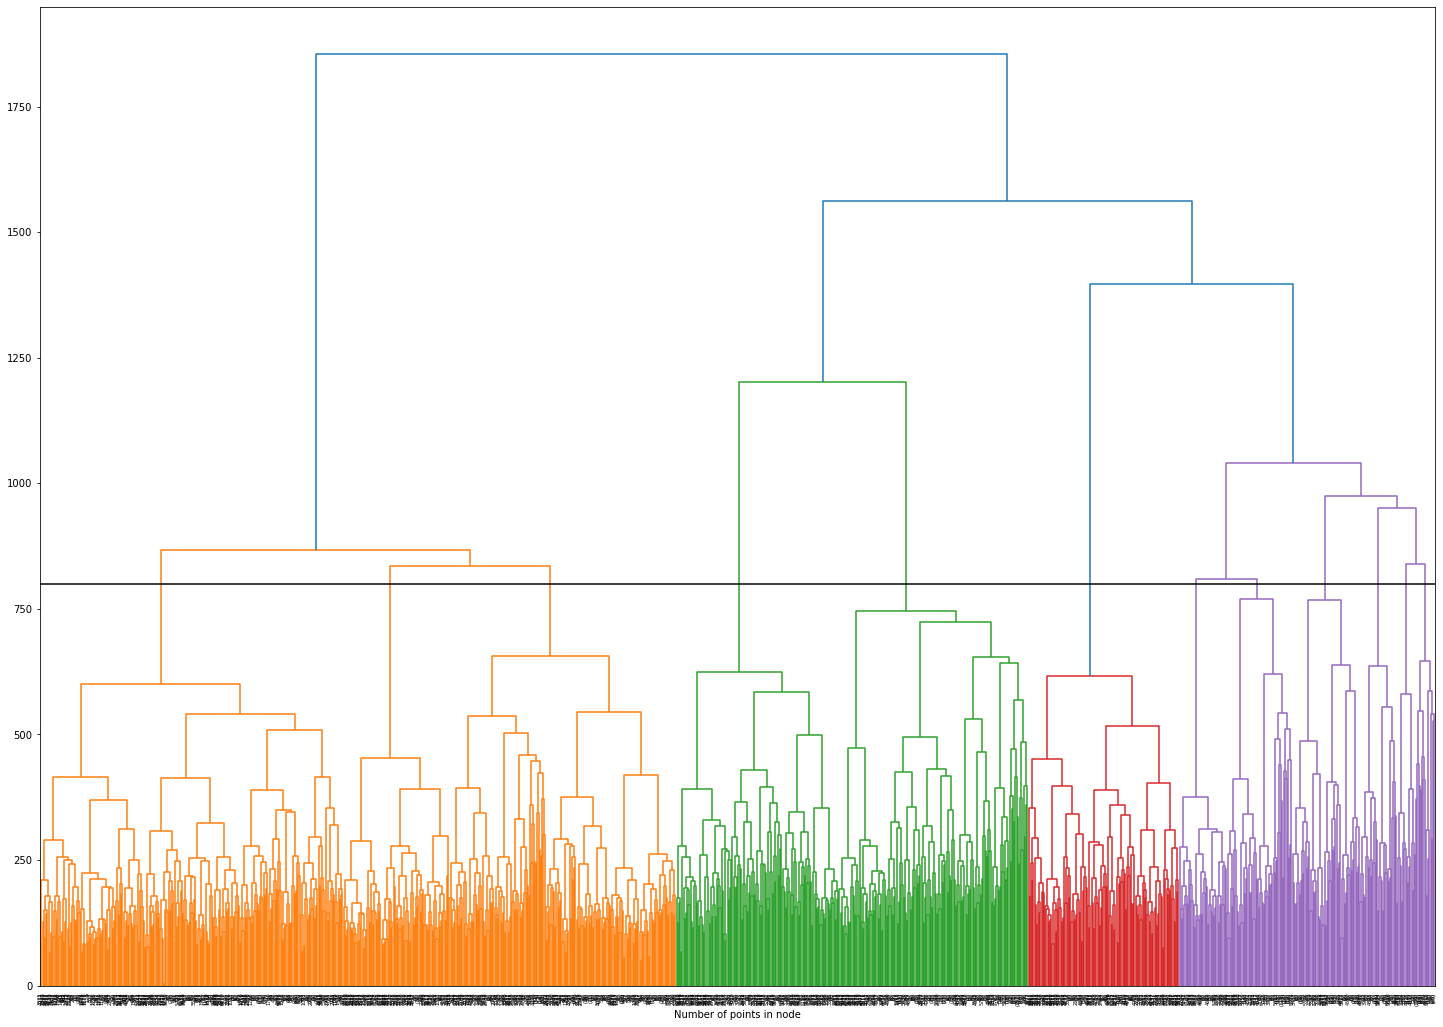

In [ ]:
plt.figure(figsize=(25,18))
dendrogramPlot(ClusteringModel, p=10, truncate_mode='level')
plt.xlabel("Number of points in node")
plt.axhline(y=800, c='k')
plt.show()

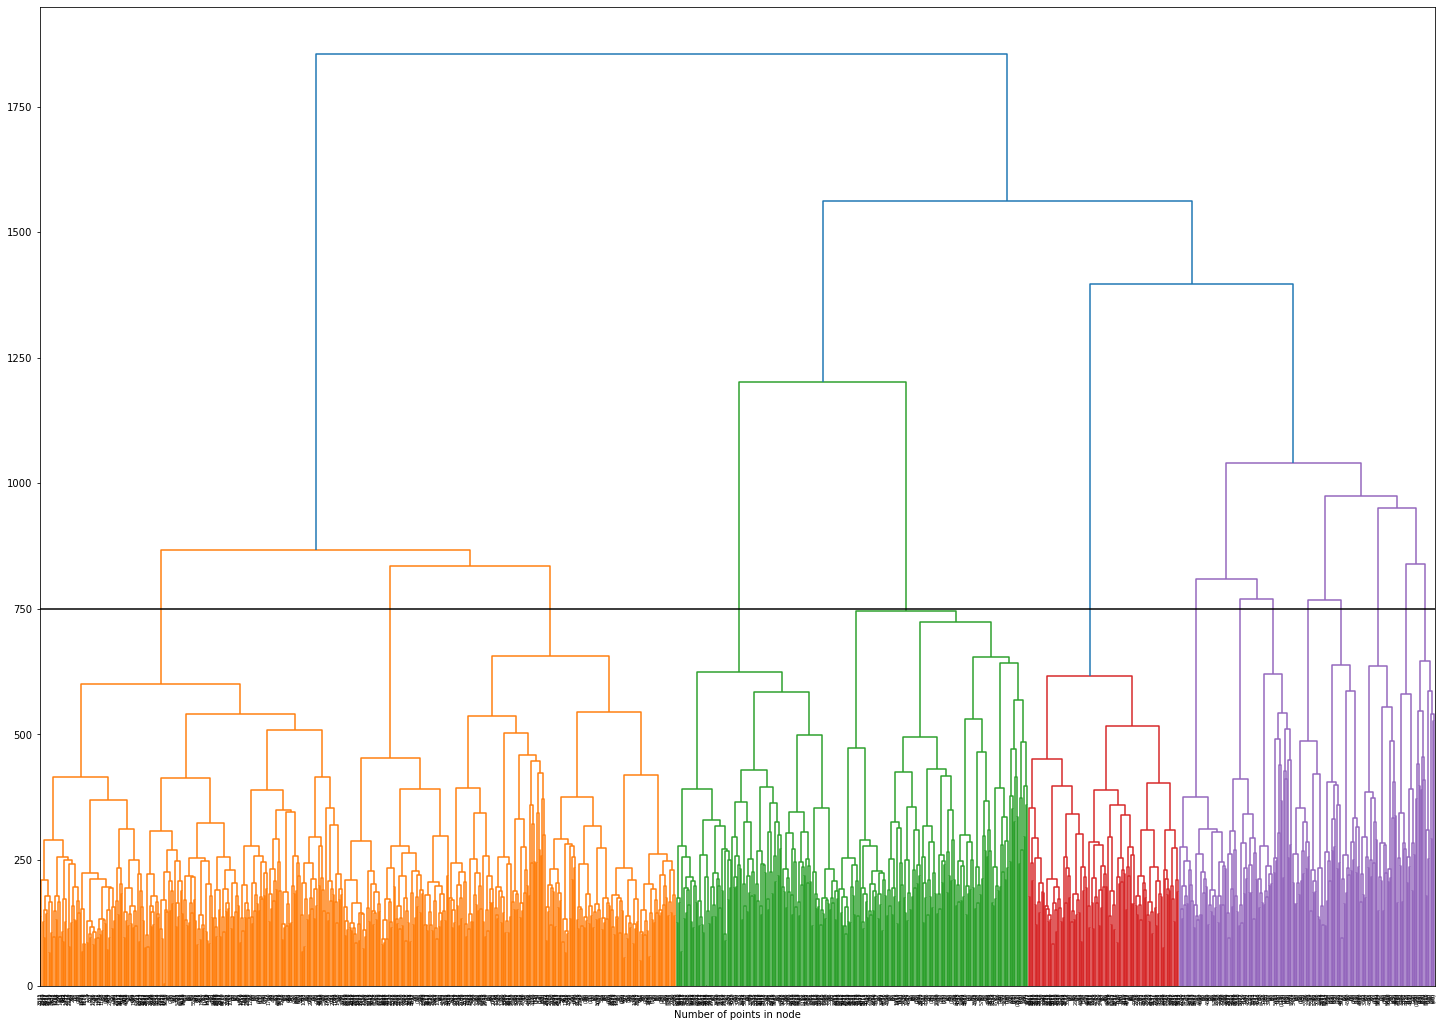

In [ ]:
plt.figure(figsize=(25,18))
dendrogramPlot(ClusteringModel, p=10, truncate_mode='level')
plt.xlabel("Number of points in node")
plt.axhline(y=750, c='k')
plt.show()

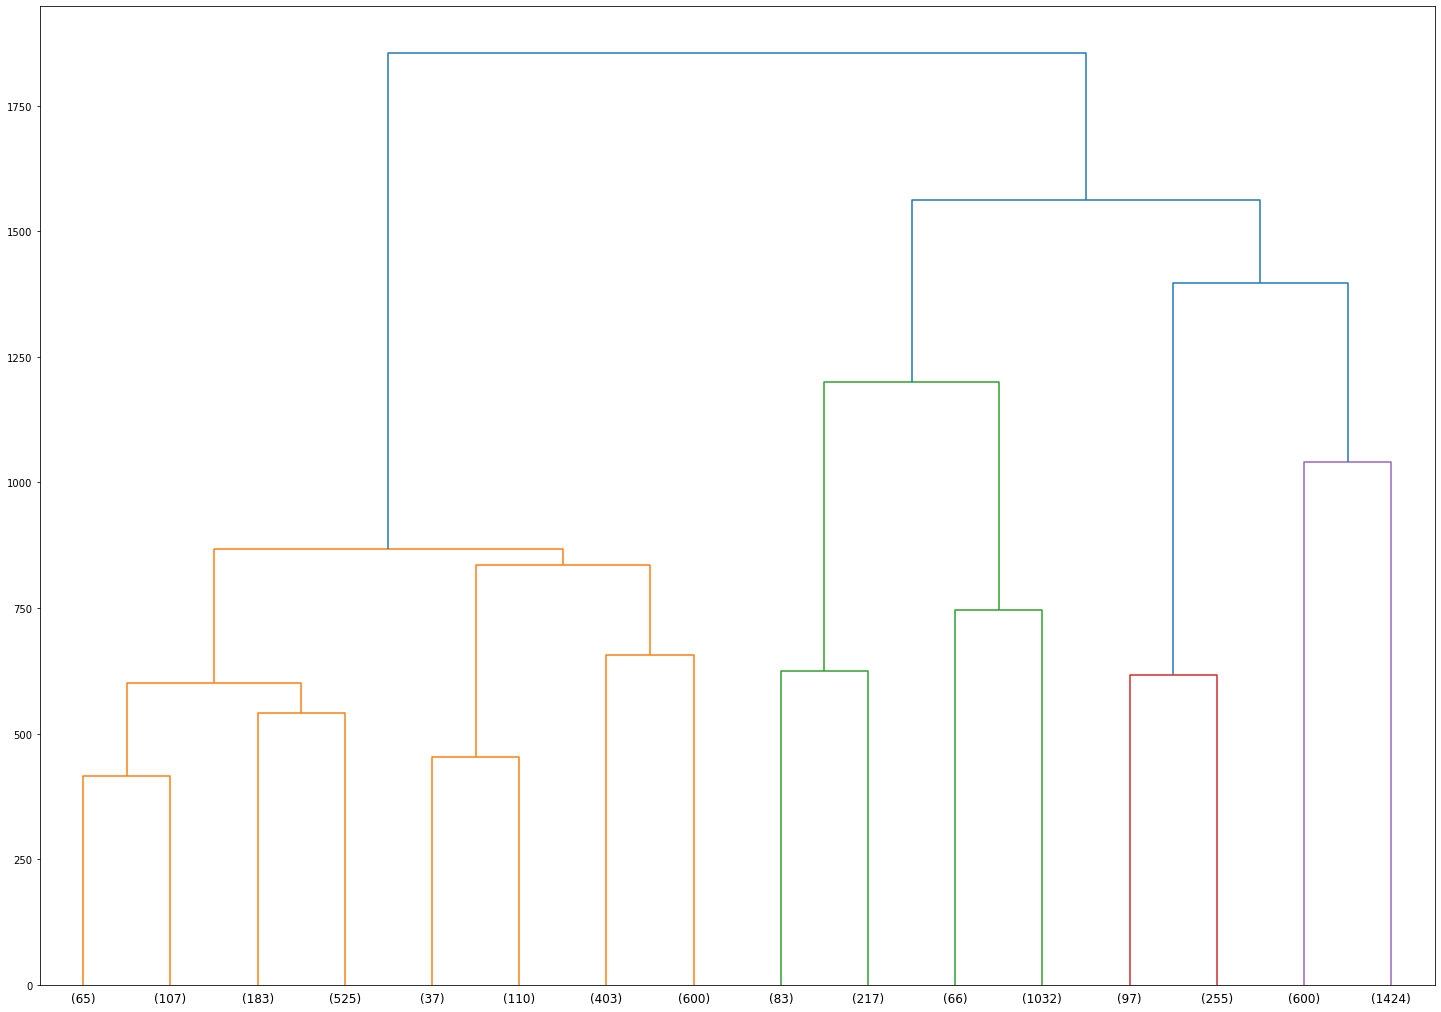

In [ ]:
plt.figure(figsize=(25,18))

dendrogramPlot(ClusteringModel, p=3, truncate_mode='level')

plt.show()

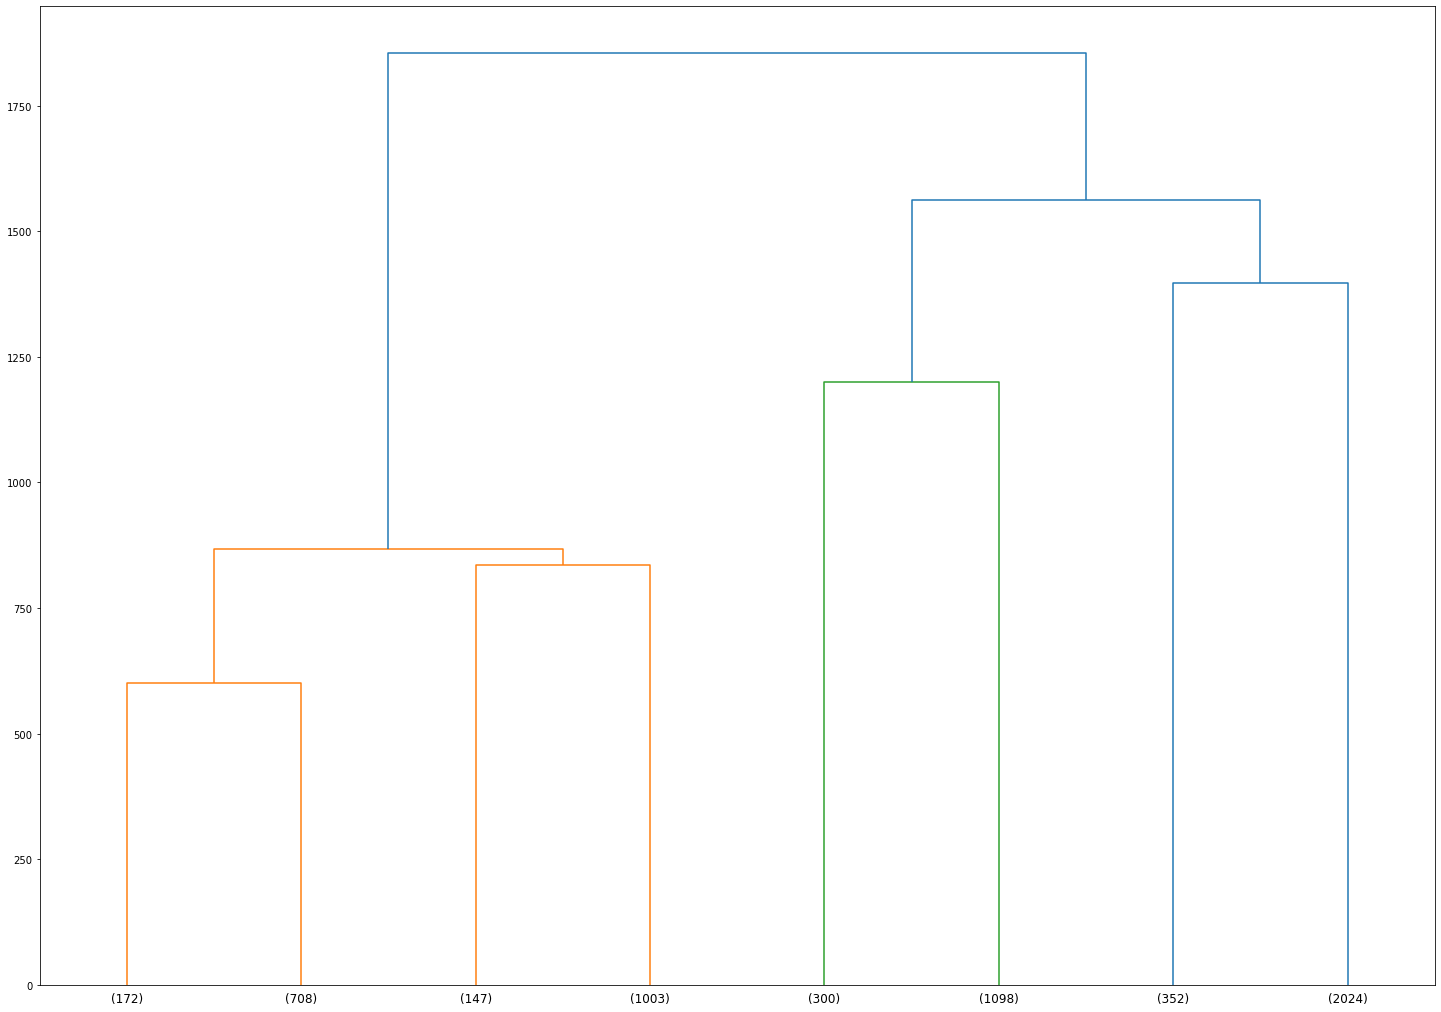

In [ ]:
plt.figure(figsize=(25,18))

dendrogramPlot(ClusteringModel, p=2, truncate_mode='level')


plt.show()

In [ ]:
AgglomerativeCluster  = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')
AgglomerativeCluster.fit_predict(pca_data)

array([ 5,  8,  5, ...,  0, 11,  4], dtype=int64)

In [ ]:
AgglomerativeCluster.labels_.sum()

33606

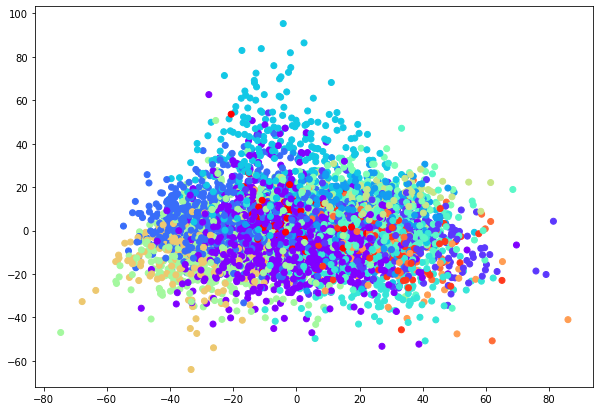

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:,0], pca_data[:,4],  c=AgglomerativeCluster7.labels_, cmap='rainbow')

For n_clusters = 15 The average silhouette_score is : 0.02447622758796164


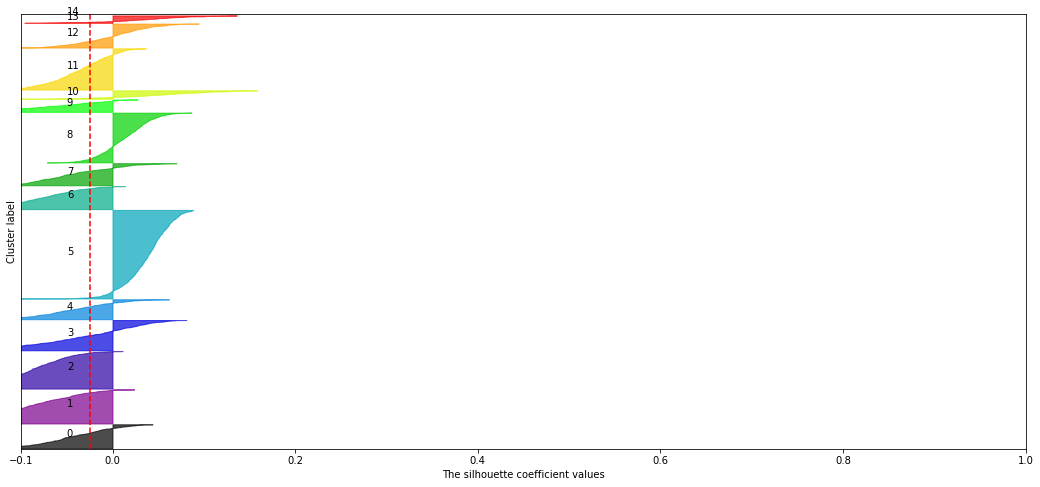

In [ ]:
range_n_clusters = [15]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer   = AgglomerativeCluster#AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(pca_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", abs(silhouette_avg))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


#     plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 20 The average silhouette_score is : -0.05956514434194441


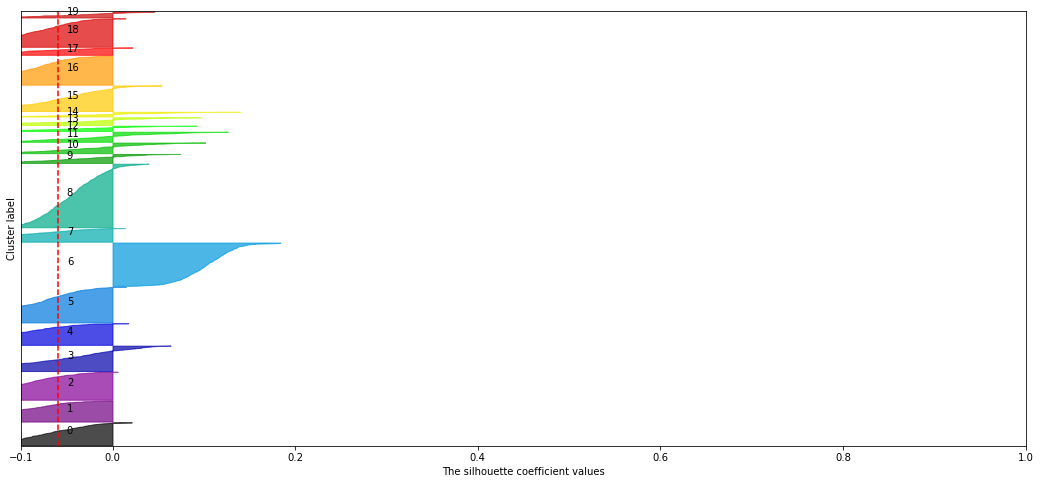

In [ ]:
range_n_clusters = [20]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer   = AgglomerativeCluster7#AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(pca_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


#     plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

plt.show()

In [ ]:
AgglomerativeCluster7  = AgglomerativeClustering(n_clusters=13, affinity='euclidean', linkage='ward')
AgglomerativeCluster7.fit_predict(pca_data)

array([ 0,  8,  0, ...,  2, 11,  4], dtype=int64)

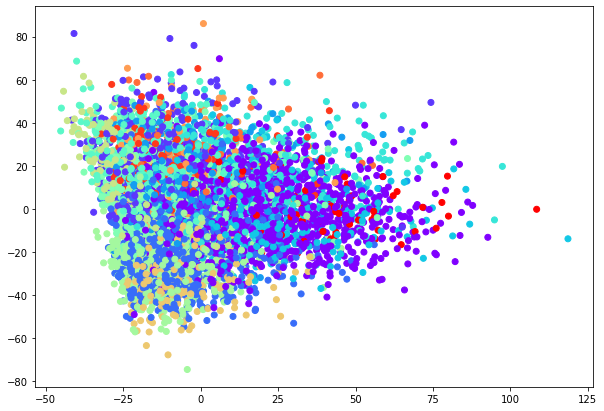

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data2[:,1], pca_data2[:,0],  c=AgglomerativeCluster7.labels_, cmap='rainbow')

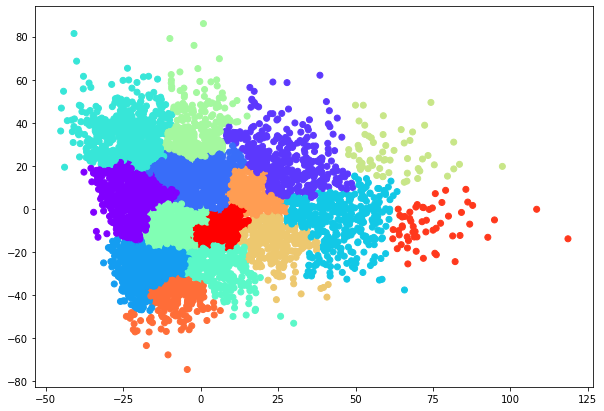

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data2[:,1], pca_data2[:,0],  c=AgglomerativeCluster7.labels_, cmap='rainbow')

In [ ]:
pca2 = PCA(n_components=2)
pca_data2 = pca2.fit_transform(df)
pca_data2

array([[-24.37020499, -25.93971173],
       [-20.31821336, -13.1176605 ],
       [-26.74125332, -24.39735239],
       ...,
       [ 39.19567327, -34.6317379 ],
       [ 31.45924361, -34.91625027],
       [ 27.88826065,  28.25090656]])

In [ ]:
AgglomerativeCluster7  = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
AgglomerativeCluster7.fit_predict(pca_data2)

array([1, 1, 1, ..., 5, 5, 2], dtype=int64)

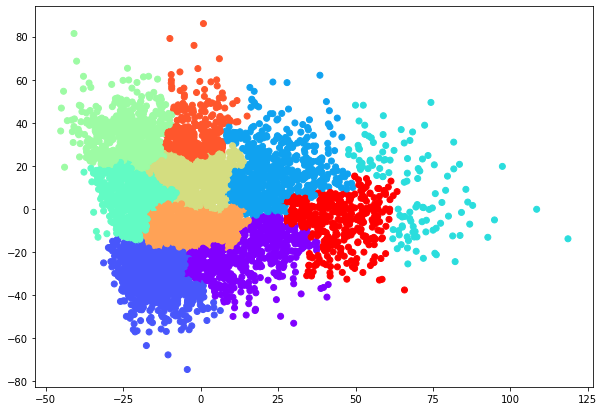

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:,1], pca_data[:,0],  c=AgglomerativeCluster7.labels_, cmap='rainbow')

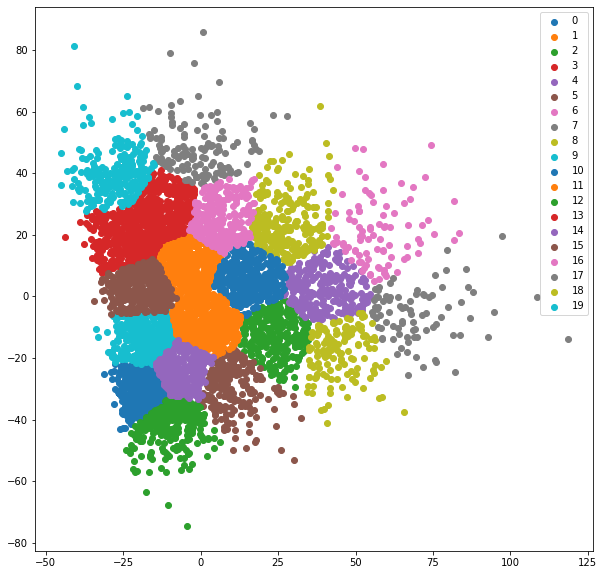

In [ ]:
#elbow  Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother
best_kmeans = KMeans(n_clusters = 20, init = "k-means++")
label = best_kmeans.fit_predict(pca_data2)

centers = np.array(best_kmeans.cluster_centers_)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
        plt.scatter(pca_data[label == i , 1] , pca_data[label == i , 0] , label = i,cmap='rainbow')
#         plt.scatter(centers[:,1], centers[:,2], marker="x", color='k')

plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AffinityPropagation

In [ ]:
clustering = AffinityPropagation(random_state=5)
clustering.fit(pca_data2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


AffinityPropagation(random_state=5)

In [ ]:
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1])

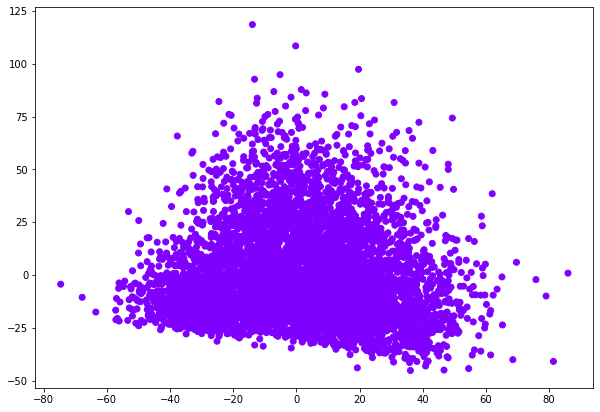

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:,0], pca_data[:,1],  c=clustering.labels_, cmap='rainbow')

# birch

In [ ]:
from sklearn.cluster import Birch
model = Birch(branching_factor = 90, n_clusters = None, threshold = 115)

In [ ]:
model.fit(pca_data)

Birch(branching_factor=90, n_clusters=None, threshold=115)

In [ ]:
model.labels_.max()

56

In [ ]:
sil_brich = []
for j in range(115,116):
    for i in range(20,55):
        model = Birch(branching_factor = i, n_clusters = None, threshold = j)
        model.fit(pca_data)
        print(model.labels_.max(),i,j)
        labels = model.labels_
        sil_brich.append(silhouette_score(pca_data, labels, metric = 'euclidean'))

48 20 115
49 21 115
51 22 115
49 23 115
49 24 115
48 25 115
49 26 115
50 27 115
53 28 115
50 29 115
53 30 115
54 31 115
51 32 115
53 33 115
51 34 115
51 35 115
51 36 115
51 37 115
51 38 115
51 39 115
53 40 115
54 41 115
55 42 115
56 43 115
56 44 115
56 45 115
56 46 115
56 47 115
56 48 115
56 49 115
56 50 115
56 51 115
56 52 115
56 53 115
56 54 115


Text(0.5, 1.0, 'britch clustring with pca')

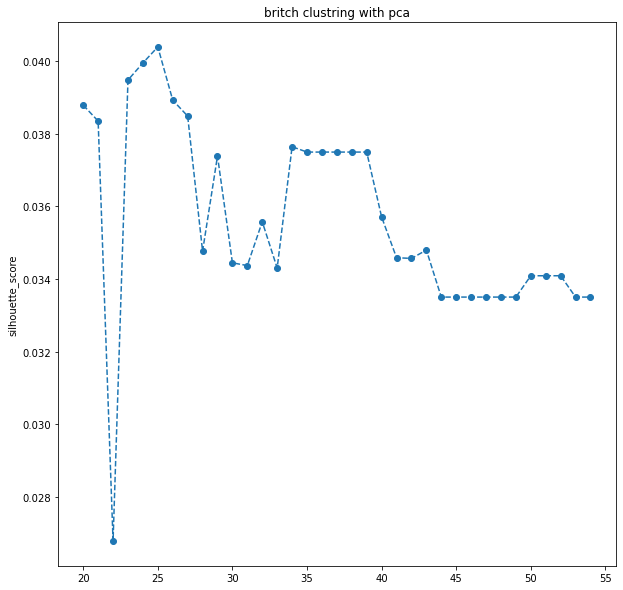

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(20,55),sil_brich , linestyle = '--' , marker ='o')
plt.ylabel('silhouette_score')
plt.title('britch clustring with pca')


In [ ]:
sil_brich2 = []
for j in range(114,115):
    for i in range(5,45):
        model = Birch(branching_factor = i, n_clusters = None, threshold = j)
        model.fit(pca_data)
        print(model.labels_.max(),i,j)
        labels = model.labels_
        sil_brich2.append(silhouette_score(pca_data, labels, metric = 'euclidean'))

117 5 114
126 6 114
112 7 114
115 8 114
121 9 114
119 10 114
126 11 114
116 12 114
120 13 114
113 14 114
112 15 114
111 16 114
118 17 114
122 18 114
120 19 114
120 20 114
122 21 114
122 22 114
123 23 114
120 24 114
123 25 114
123 26 114
132 27 114
130 28 114
129 29 114
129 30 114
130 31 114
127 32 114
125 33 114
127 34 114
138 35 114
135 36 114
133 37 114
129 38 114
139 39 114
133 40 114
130 41 114
132 42 114
134 43 114
135 44 114


Text(0.5, 1.0, 'britch clustring with pca')

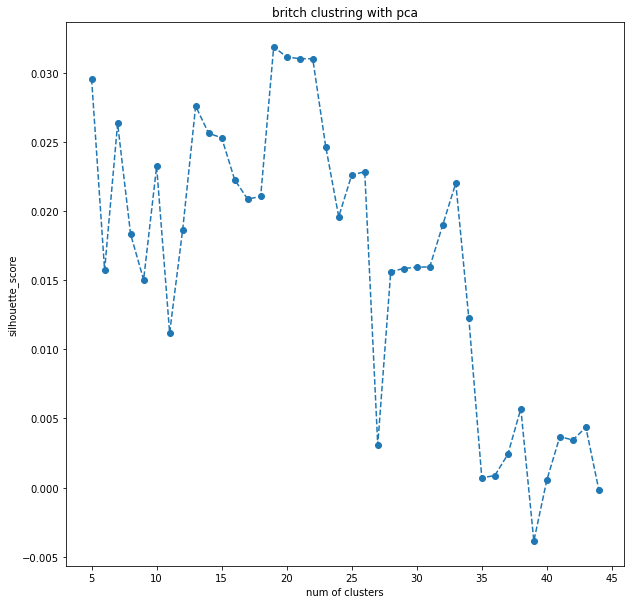

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(5,45),sil_brich2 , linestyle = '--' , marker ='o')
plt.xlabel('branching factor')
plt.ylabel('silhouette_score')
plt.title('britch clustring with pca')

In [ ]:
model = Birch(branching_factor = 25, n_clusters = None, threshold = 115)
model.fit(pca_data)

Birch(branching_factor=25, n_clusters=None, threshold=115)

In [ ]:
model.labels_.max()

48

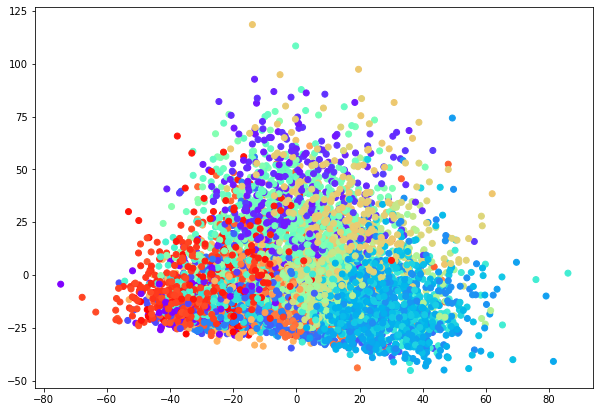

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:,0], pca_data[:,1],  c=model.labels_, cmap='rainbow')

For n_clusters = 48 The average silhouette_score is : 0.04038722088276596


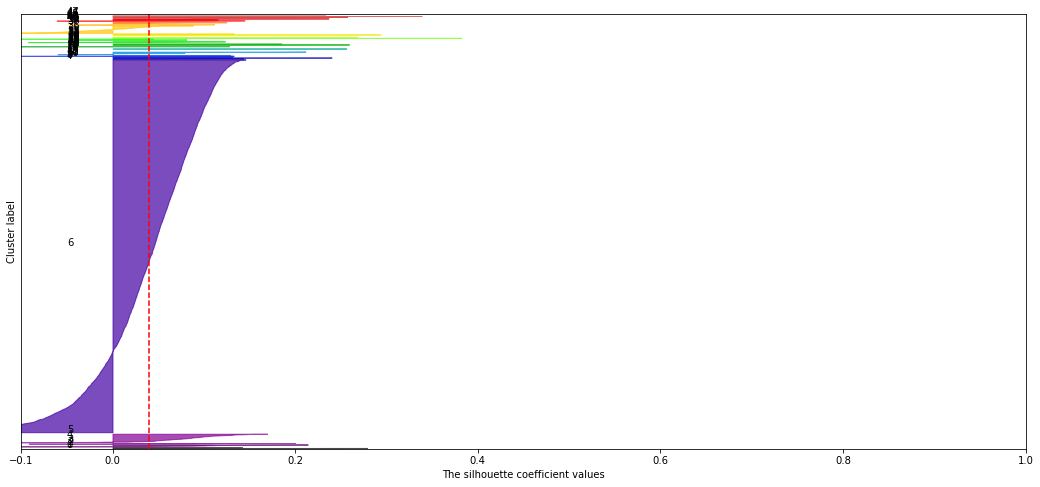

In [ ]:
range_n_clusters = [48]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer    = Birch(branching_factor = 25, n_clusters = None, threshold = 115)#AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(pca_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


#     plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

plt.show()

In [ ]:
dict1 = df[model.labels_==6].sum().to_dict()
sorted(dict1.items(), key=operator.itemgetter(1), reverse=True)

[('model', 76175),
 ('learning', 69440),
 ('data', 67646),
 ('set', 51622),
 ('algorithm', 48475),
 ('using', 47871),
 ('function', 47817),
 ('time', 42221),
 ('figure', 39895),
 ('number', 37556),
 ('models', 34335),
 ('problem', 33847),
 ('used', 33761),
 ('training', 33713),
 ('network', 32288),
 ('given', 32235),
 ('results', 31676),
 ('also', 31487),
 ('distribution', 31162),
 ('neural', 30041),
 ('based', 29664),
 ('first', 27247),
 ('use', 27001),
 ('information', 26788),
 ('error', 26279),
 ('input', 25863),
 ('method', 25646),
 ('linear', 25326),
 ('state', 25236),
 ('matrix', 25119),
 ('different', 24839),
 ('probability', 23301),
 ('methods', 22891),
 ('case', 22784),
 ('space', 22690),
 ('performance', 22221),
 ('parameters', 21881),
 ('networks', 21793),
 ('approach', 21539),
 ('image', 21419),
 ('value', 20466),
 ('algorithms', 20214),
 ('vector', 19748),
 ('large', 19712),
 ('random', 19573),
 ('features', 18953),
 ('section', 18857),
 ('order', 18654),
 ('gaussian', 185

In [ ]:
model = Birch(branching_factor = 4, n_clusters = None, threshold = 20)
model.fit(pca_data2)

Birch(branching_factor=4, n_clusters=None, threshold=20)

In [ ]:
model.labels_.max()

6

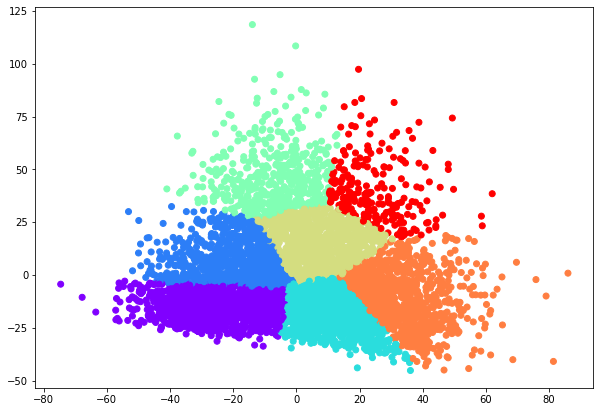

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:,0], pca_data[:,1],  c=model.labels_, cmap='rainbow')

# _____________________________________________________________________

# dbscan

In [ ]:
neighbors = NearestNeighbors(n_neighbors=1600)
neighbors_fit = neighbors.fit(pca_data)
distances1, indices = neighbors_fit.kneighbors(pca_data)

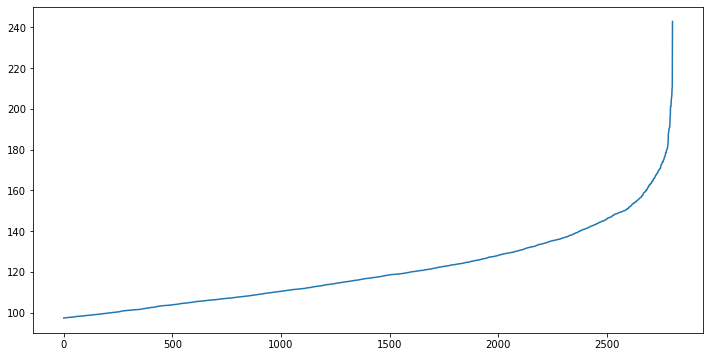

In [ ]:
distances1 = np.sort(distances1, axis=0)[3000:]
distances1 = distances1[:,1]
plt.plot(distances1)

In [ ]:
distances1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.9073486328125e-06,
 1.9073486328125e-06,
 0.16138394391760333,
 0.16138394391760333,
 2.4635934138461244,
 2.4635934138461244,
 2.505766868487139,
 12.38289604385762,
 12.798894675248938,
 13.41201824542313,
 16.781216495703298,
 25.658593366511056,
 29.127453012106717,
 29.127453012106717,
 33.52712176724278,
 35.04019224452056,
 37.623293073019276,
 37.623293073019276,
 37.877156154380415,
 39.69113198556524,
 39.69113198556524,
 39.91961374090828,
 39.91961374090828,
 39.98197009846091,
 40.30809211951967,
 41.09972519899689,
 41.09972519899689,
 41.23720685862436,
 41.23720685862436,
 41.287046861021885,
 41.4102676104429,
 41.911911323812696,
 41.911911323812696,
 41.96061548834433,
 42.01729474402318,
 42.71244854368994,
 42.76063026142024,
 42.76063026142024,
 43.17550753365152,
 43.8556488381473,
 43.8556488381473,
 44.36754706681932,
 44.36754706681932,
 45.25096597218097,
 45.25096597218097,
 45.36261981901979,
 45.3626198190

In [ ]:
clustering = DBSCAN(eps=160, min_samples=1500).fit(pca_data)

In [ ]:
clustering.labels_.max()

0

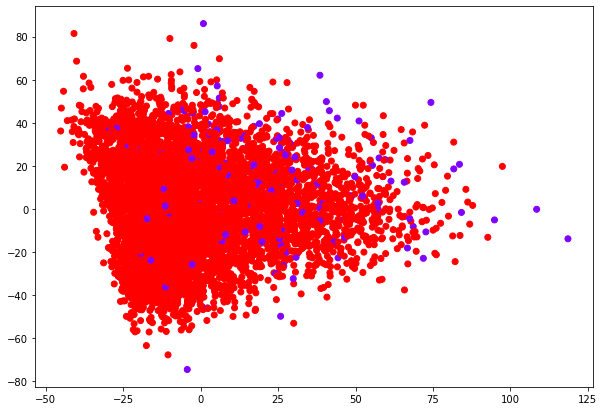

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data2[:,1], pca_data2[:,0],  c=clustering.labels_, cmap='rainbow')

In [ ]:
pca6 = PCA(n_components=600)
pca_data6 = pca6.fit_transform(df)
pca_data6

array([[-24.37017648, -25.93919931,  -3.51468079, ...,   0.20157296,
         -0.71742639,   0.76145418],
       [-20.31847231, -13.11744978,  21.82981478, ...,   3.37030177,
         -1.34063406,   0.05680701],
       [-26.74119309, -24.39689193,   8.45183575, ...,  -0.50225654,
          1.01693949,  -0.74814525],
       ...,
       [ 39.19555987, -34.63174133, -23.90070017, ...,   3.79094761,
         -0.97661943,  -2.13240877],
       [ 31.45924188, -34.91609827,  -4.7111536 , ...,   1.94569067,
         -0.5510585 ,   0.03989144],
       [ 27.88764029,  28.24974285, -21.68621832, ...,   1.24405875,
         -0.75703622,   0.74749039]])

In [ ]:
neighbors = NearestNeighbors(n_neighbors=600)
neighbors_fit = neighbors.fit(pca_data6)
distances1, indices = neighbors_fit.kneighbors(pca_data6)

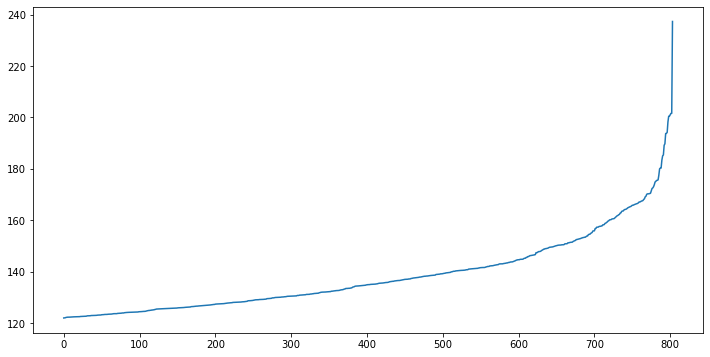

In [ ]:
distances1 = np.sort(distances1, axis=0)[5000:]
distances1 = distances1[:,1]
plt.plot(distances1)

In [ ]:
clustering = DBSCAN(eps=160, min_samples=1200).fit(pca_data6)

NameError: name 'DBSCAN' is not defined

In [ ]:
clustering.labels_.max()

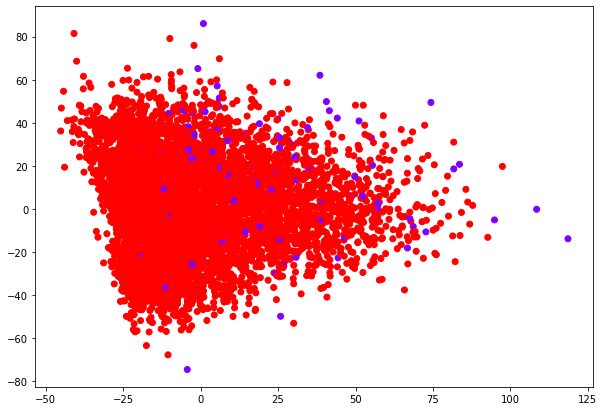

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data2[:,1], pca_data2[:,0],  c=clustering.labels_, cmap='rainbow')

0.2924809164991508


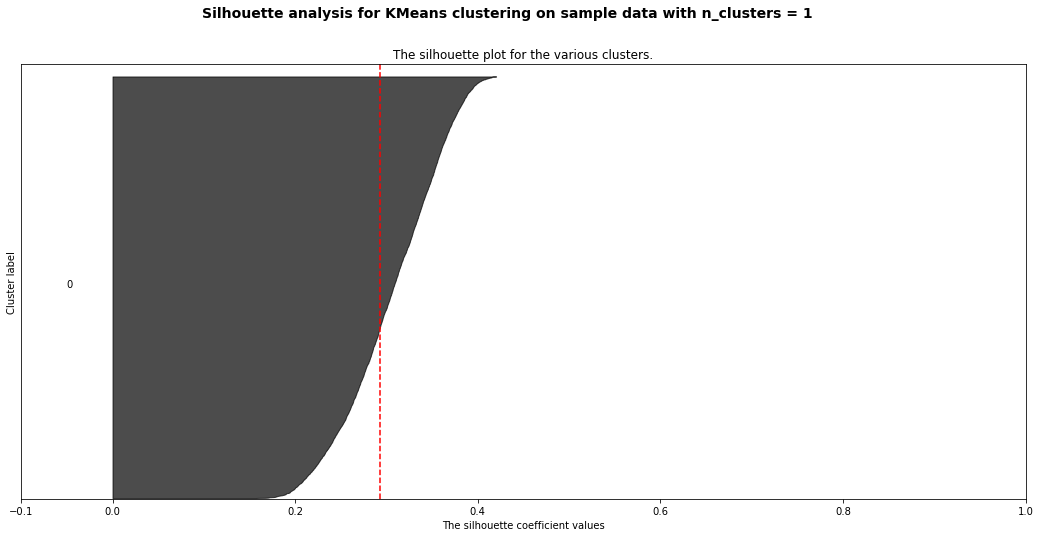

In [ ]:



for j in [0]:
    # Create a subplot with 1 row and 2 columns
    n_clusters=1
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 8)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])


    clusterer = DBSCAN(eps=160, min_samples=1500).fit(pca_data)
    cluster_labels = clusterer.fit_predict(pca_data)


    silhouette_avg = silhouette_score(pca_data, cluster_labels, metric = 'euclidean')
    print( silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels,metric = 'euclidean')

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
not_outlier = []
for i in range ( 0 , len(clustering.labels_)) :
    if (clustering.labels_[i] == 0 ) :
        not_outlier.append(i)


print(len(not_outlier))
print(not_outlier)


5647
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [ ]:
not_outlier = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2831, 2832, 2833, 2834, 2835, 2836, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3369, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3432, 3433, 3434, 3435, 3436, 3438, 3439, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3457, 3458, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3595, 3596, 3597, 3598, 3599, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3668, 3669, 3670, 3671, 3672, 3673, 3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3732, 3733, 3734, 3735, 3736, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 3850, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3861, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3875, 3876, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3908, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4020, 4021, 4022, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098, 4099, 4100, 4101, 4102, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 4120, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4141, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 4150, 4151, 4152, 4153, 4155, 4156, 4157, 4158, 4159, 4160, 4162, 4163, 4164, 4166, 4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191, 4192, 4193, 4194, 4195, 4196, 4197, 4198, 4199, 4200, 4201, 4202, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4233, 4234, 4235, 4236, 4237, 4238, 4239, 4240, 4241, 4242, 4243, 4244, 4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4253, 4254, 4255, 4256, 4257, 4258, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4267, 4268, 4269, 4270, 4271, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4294, 4295, 4296, 4297, 4298, 4299, 4300, 4301, 4302, 4303, 4304, 4306, 4307, 4308, 4309, 4310, 4312, 4313, 4314, 4315, 4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4381, 4382, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4462, 4463, 4464, 4465, 4466, 4467, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4571, 4572, 4573, 4574, 4575, 4576, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4612, 4613, 4614, 4615, 4616, 4617, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4674, 4675, 4676, 4677, 4678, 4679, 4680, 4682, 4683, 4684, 4685, 4686, 4687, 4688, 4689, 4690, 4691, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4699, 4700, 4701, 4702, 4703, 4704, 4705, 4706, 4707, 4708, 4709, 4710, 4711, 4712, 4713, 4714, 4715, 4716, 4717, 4718, 4719, 4720, 4721, 4722, 4723, 4724, 4725, 4727, 4728, 4729, 4730, 4731, 4733, 4734, 4735, 4736, 4737, 4738, 4739, 4740, 4741, 4742, 4743, 4744, 4745, 4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760, 4761, 4762, 4763, 4764, 4765, 4767, 4768, 4769, 4770, 4771, 4772, 4773, 4774, 4775, 4776, 4777, 4778, 4779, 4780, 4781, 4782, 4783, 4784, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810, 4811, 4812, 4813, 4814, 4815, 4817, 4818, 4819, 4820, 4821, 4822, 4824, 4825, 4826, 4827, 4828, 4829, 4830, 4831, 4832, 4833, 4834, 4835, 4836, 4837, 4838, 4839, 4841, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854, 4855, 4856, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4865, 4866, 4867, 4868, 4869, 4871, 4872, 4873, 4874, 4875, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4896, 4897, 4898, 4899, 4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4939, 4940, 4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4951, 4952, 4954, 4955, 4956, 4957, 4958, 4959, 4960, 4962, 4964, 4966, 4967, 4968, 4969, 4970, 4972, 4973, 4974, 4975, 4976, 4977, 4979, 4980, 4981, 4982, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999, 5000, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5050, 5051, 5052, 5053, 5054, 5055, 5056, 5058, 5060, 5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086, 5087, 5088, 5090, 5091, 5092, 5093, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5119, 5120, 5121, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5162, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5170, 5171, 5172, 5173, 5174, 5175, 5176, 5177, 5178, 5179, 5180, 5181, 5182, 5183, 5184, 5186, 5188, 5189, 5190, 5192, 5193, 5194, 5195, 5196, 5197, 5198, 5199, 5200, 5201, 5202, 5203, 5204, 5205, 5206, 5207, 5208, 5209, 5210, 5211, 5212, 5213, 5214, 5215, 5216, 5217, 5218, 5219, 5220, 5221, 5222, 5223, 5224, 5225, 5226, 5227, 5228, 5229, 5230, 5231, 5232, 5233, 5234, 5235, 5236, 5237, 5238, 5239, 5240, 5241, 5242, 5243, 5244, 5245, 5246, 5247, 5248, 5251, 5252, 5254, 5255, 5256, 5257, 5258, 5259, 5260, 5261, 5262, 5263, 5264, 5265, 5266, 5268, 5269, 5270, 5271, 5272, 5273, 5274, 5275, 5276, 5277, 5278, 5279, 5280, 5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290, 5291, 5292, 5293, 5294, 5295, 5296, 5297, 5298, 5299, 5300, 5301, 5303, 5304, 5305, 5306, 5307, 5308, 5311, 5312, 5313, 5314, 5315, 5316, 5317, 5318, 5319, 5320, 5321, 5322, 5324, 5325, 5326, 5327, 5328, 5329, 5330, 5331, 5332, 5333, 5336, 5337, 5338, 5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 5348, 5349, 5351, 5352, 5353, 5354, 5355, 5357, 5358, 5359, 5360, 5361, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5369, 5370, 5371, 5372, 5373, 5375, 5377, 5378, 5379, 5380, 5381, 5382, 5383, 5384, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5393, 5394, 5395, 5396, 5397, 5398, 5399, 5400, 5401, 5402, 5403, 5404, 5405, 5406, 5407, 5408, 5409, 5411, 5412, 5413, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5427, 5429, 5430, 5431, 5432, 5433, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5454, 5455, 5456, 5457, 5458, 5459, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 5481, 5482, 5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500, 5501, 5502, 5503, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5527, 5528, 5529, 5530, 5531, 5532, 5533, 5535, 5536, 5537, 5538, 5539, 5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5614, 5615, 5618, 5619, 5620, 5621, 5624, 5625, 5627, 5628, 5629, 5630, 5631, 5632, 5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5649, 5651, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5666, 5667, 5669, 5670, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5697, 5698, 5699, 5700, 5701, 5702, 5703, 5704, 5705, 5706, 5707, 5709, 5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5719, 5720, 5721, 5722, 5723, 5724, 5725, 5726, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735, 5736, 5737, 5738, 5739, 5741, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803]

In [ ]:
df400 = df.iloc[not_outlier]

In [ ]:
df400

Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilities,ability,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
1987_1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1987_2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1987_3,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1987_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987_5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015_399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015_402,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pca_data[not_outlier]

(5647, 800)

In [ ]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(pca_data[not_outlier])
distances1, indices = neighbors_fit.kneighbors(pca_data[not_outlier])

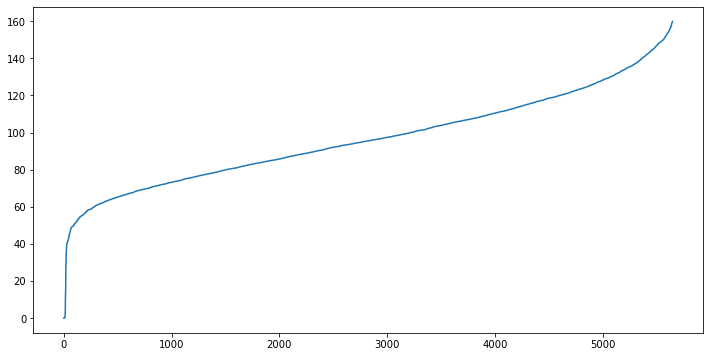

In [ ]:
distances1 = np.sort(distances1, axis=0)
distances1 = distances1[:,1]
plt.plot(distances1)

In [ ]:
clustering = DBSCAN(eps=60, min_samples=110).fit(pca_data[not_outlier])

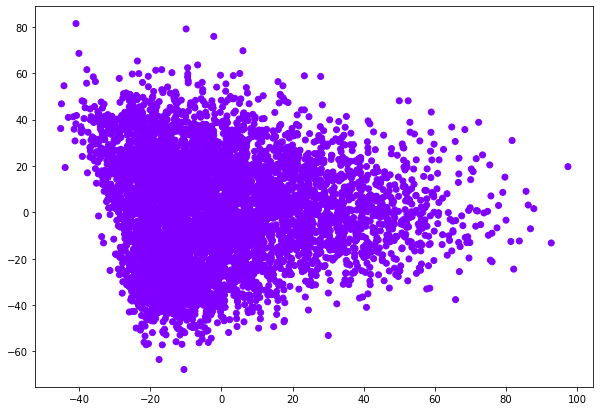

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[not_outlier][:,1], pca_data[not_outlier][:,0],  c=clustering.labels_, cmap='rainbow')

# end db scan

For n_clusters = 4 The average silhouette_score is : 0.01745182315218406
For n_clusters = 5 The average silhouette_score is : 0.01725013074399225
For n_clusters = 7 The average silhouette_score is : -0.023117232927872967
For n_clusters = 10 The average silhouette_score is : -0.027897179039885603
For n_clusters = 20 The average silhouette_score is : -0.031150251339842172


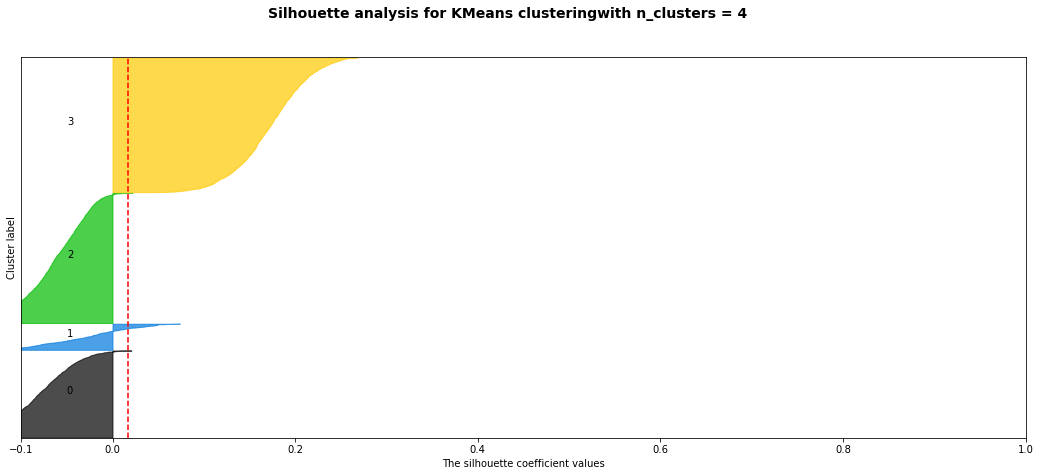

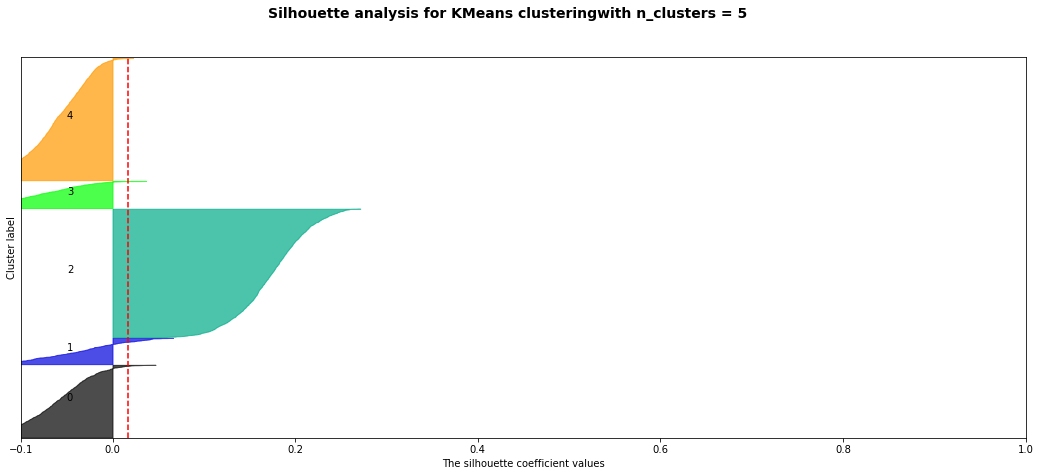

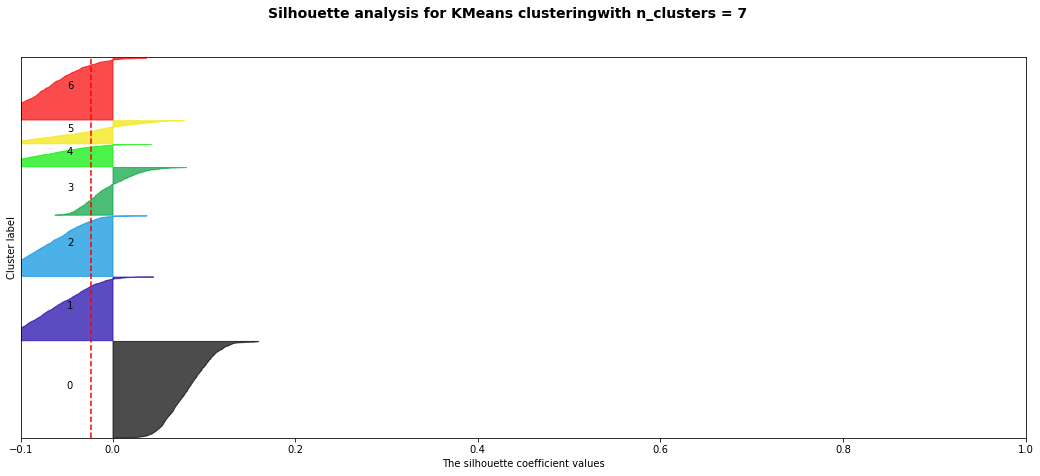

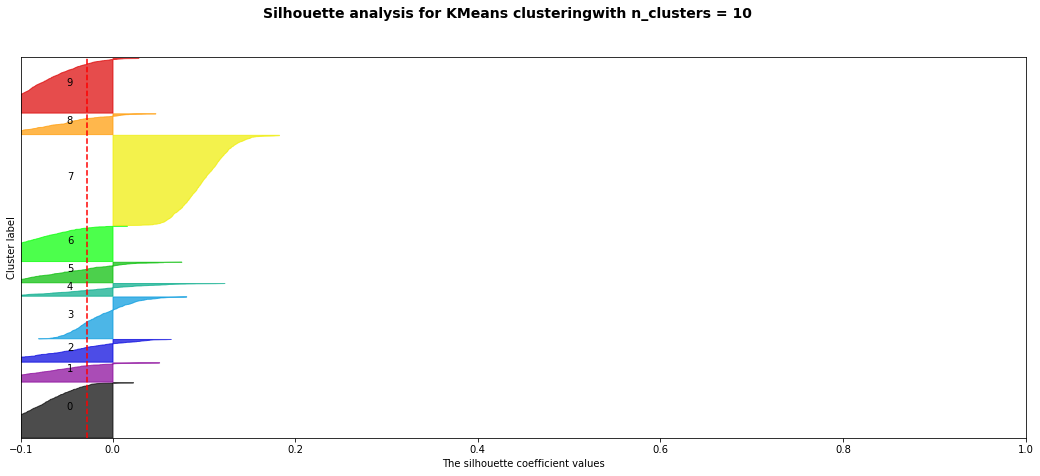

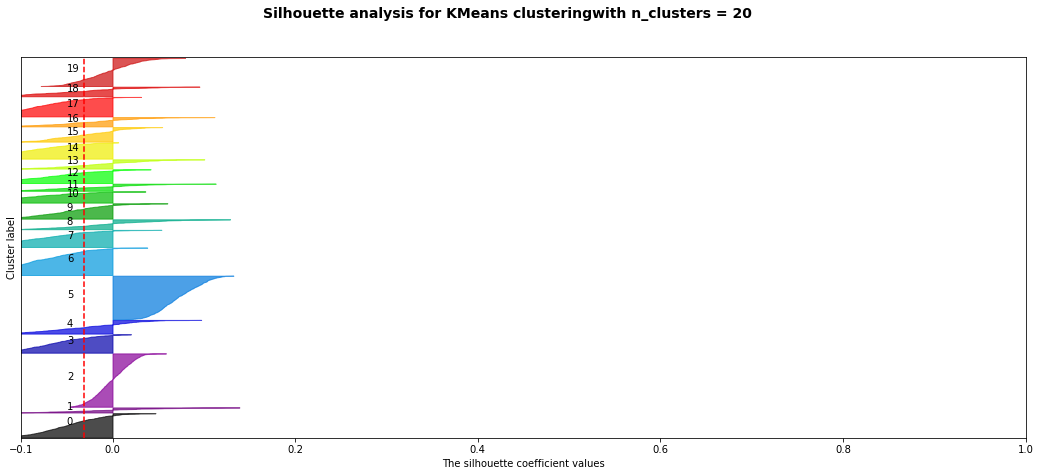

In [ ]:


range_n_clusters = [4,5,7,10, 20 ]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels, metric = 'euclidean')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data, cluster_labels,metric = 'euclidean')

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()